In [1]:
%load_ext autotime

time: 718 µs (started: 2021-06-23 08:58:11 +00:00)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import arviz as az

import tensorflow as tf

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

time: 1min 2s (started: 2021-06-23 08:58:13 +00:00)


## Read files

In [3]:
path = "/home/ubuntu/kmexis/fotini/inputs.xlsx"
X = pd.read_excel(path)
X

ALL_E_1   ALL_E_2   ALL_LCOL  ALL_Q_MAX  ALL_Q_SENS_1  ALL_Q_SENS_2  \
0      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
1      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
2      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
3      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
4      0.780000  0.568000  15.000000   0.750000      0.550000      0.550000   
...         ...       ...        ...        ...           ...           ...   
14658  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14659  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14660  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14661  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   
14662  0.917109  0.510756  15.960938   0.787109      0.644922      0.448047   

       ALL_SPCE_1_1_1  ALL_SPCE_1_2_1  ALL_SPCE_1_3_1  ALL_SPCE_1_4_1  ...  \
0            0.563438    8.543496e-02    1.717066e-02    6.322206e-07  ...   
1            0.564451    8.466281e-02    2.905807e-02    1.612620e-06  ...   
2            0.566313    7.832914e-02    4.802137e-02    4.036888e-06  ...   
3            0.571410    6.752206e-02    7.818277e-02    1.006441e-05  ...   
4            0.581038    5.349233e-02    1.279746e-01    2.608407e-05  ...   
...               ...             ...             ...             ...  ...   
14658        0.422856    6.487419e-09    1.306235e-15    6.395148e-14  ...   
14659        0.424128    1.190282e-08    1.238555e-15    6.192088e-14  ...   
14660        0.425468    2.186053e-08    1.171234e-15    5.985949e-14  ...   
14661        0.426815    4.017112e-08    1.104526e-15    5.777195e-14  ...   
14662        0.428164    7.382999e-08    1.038707e-15    5.566414e-14  ...   

       ALL_SPCE_2_3_1  ALL_SPCE_2_4_1  ALL_SPC_1_1_1  ALL_SPC_1_2_1  \
0        3.267351e-06    5.097847e-03       0.563424   8.529911e-02   
1        7.447066e-07    2.227611e-03       0.564439   8.480581e-02   
2        4.323652e-08    3.645484e-04       0.566283   7.868749e-02   
3        1.249398e-09    5.785877e-07       0.571336   6.804240e-02   
4        1.362521e-08    1.603492e-10       0.580926   5.412120e-02   
...               ...             ...            ...            ...   
14658    4.803168e-02    2.144490e-04       0.422844   6.327573e-09   
14659    8.602525e-02    5.536509e-04       0.424114   1.160900e-08   
14660    1.373932e-01    1.272117e-03       0.425454   2.132021e-08   
14661    1.981678e-01    2.642789e-03       0.426801   3.917766e-08   
14662    2.597403e-01    4.988145e-03       0.428151   7.200418e-08   

       ALL_SPC_1_3_1  ALL_SPC_1_4_1  ALL_SPC_2_1_1  ALL_SPC_2_2_1  \
0       1.664498e-02   5.988277e-07       0.687950   2.880853e-23   
1       2.844474e-02   1.552307e-06       0.707030   1.396225e-21   
2       4.705688e-02   3.889567e-06       0.910255   1.053715e-11   
3       7.662721e-02   9.690975e-06       1.467872   3.509466e-08   
4       1.253729e-01   2.506206e-05       1.891948   6.335367e-07   
...              ...            ...            ...            ...   
14658   1.309060e-15   6.403537e-14       0.602009   1.006856e-01   
14659   1.241369e-15   6.200610e-14       0.605812   5.134115e-02   
14660   1.174029e-15   5.994592e-14       0.608941   2.344860e-02   
14661   1.107290e-15   5.785936e-14       0.611419   9.704472e-03   
14662   1.041429e-15   5.575228e-14       0.613521   3.671428e-03   

       ALL_SPC_2_3_1  ALL_SPC_2_4_1  
0       3.467715e-06   5.264804e-03  
1       7.997385e-07   2.318216e-03  
2       5.372676e-08   4.240466e-04  
3       1.085604e-09   8.770652e-07  
4       1.284046e-08   2.375659e-10  
...              ...            ...  
14658   4.732883e-02   2.096068e-04  
14659   8.418414e-02   5.339192e-04  
14660   1.350270e-01   1.231820e-03  
14661   1.955508e-01   2.569345e-03  
14662   2.572876e-01  

time: 1min 11s (started: 2021-06-23 08:59:16 +00:00)


In [4]:
path = "/home/ubuntu/kmexis/fotini/outputs.xlsx"
y = pd.read_excel(path)
y

ALL_C_1_1_1   ALL_C_1_2_1   ALL_C_1_3_1   ALL_C_1_4_1  ALL_C_2_1_1  \
0         2.253750  2.382119e-02  2.228231e-03  6.335252e-08     2.751908   
1         2.257804  2.380354e-02  3.805332e-03  1.630441e-07     2.830547   
2         2.265252  2.235905e-02  6.393657e-03  4.148313e-07     3.656909   
3         2.285642  2.008041e-02  1.088621e-02  1.080663e-06     5.896080   
4         2.324152  1.717117e-02  1.937113e-02  3.039809e-06     7.573926   
...            ...           ...           ...           ...          ...   
14658     1.691423  4.910249e-10  4.073056e-17  1.582846e-15     2.408129   
14659     1.696511  9.132704e-10  3.920005e-17  1.555150e-15     2.423387   
14660     1.701870  1.701472e-09  3.765405e-17  1.526628e-15     2.435874   
14661     1.707258  3.171803e-09  3.607078e-17  1.496226e-15     2.445764   
14662     1.712656  5.913508e-09  3.445685e-17  1.463952e-15     2.454163   

        ALL_C_2_2_1   ALL_C_2_3_1   ALL_C_2_4_1  
0      1.729557e-23  1.140269e-06  1.347704e-03  
1      2.591292e-21  2.988777e-07  6.754129e-04  
2      4.118285e-11  6.184957e-08  3.844000e-04  
3      9.097161e-07  1.912262e-08  6.235101e-06  
4      4.635271e-05  7.225127e-07  5.844611e-09  
...             ...           ...           ...  
14658  3.738353e-02  8.665681e-03  2.968649e-05  
14659  1.930143e-02  1.601145e-02  7.902005e-05  
14660  8.987111e-03  2.624377e-02  1.862388e-04  
14661  3.776143e-03  3.865282e-02  3.949334e-04  
14662  1.447000e-03  5.158185e-02  7.586947e-04  

[14663 rows x 8 columns]

time: 29.7 s (started: 2021-06-23 09:00:27 +00:00)


# Taking a look at data 

In [5]:
X.describe()

ALL_E_1       ALL_E_2      ALL_LCOL     ALL_Q_MAX  ALL_Q_SENS_1  \
count  14663.000000  14663.000000  14663.000000  14663.000000  14663.000000   
mean       0.736508      0.557071     14.910065      0.807095      0.584093   
std        0.135973      0.091965      1.340941      0.112741      0.221951   
min        0.555141      0.412244     12.375000      0.607422      0.163281   
25%        0.606328      0.464162     13.921875      0.703125      0.395313   
50%        0.703219      0.568000     14.882812      0.810547      0.641406   
75%        0.840328      0.633231     15.960938      0.921875      0.739844   
max        1.008516      0.729081     17.953125      0.996094      0.996484   

       ALL_Q_SENS_2  ALL_SPCE_1_1_1  ALL_SPCE_1_2_1  ALL_SPCE_1_3_1  \
count  14663.000000    14663.000000    1.466300e+04    1.466300e+04   
mean       0.409457        0.635476    3.005268e-02    1.831368e-01   
std        0.177492        0.288546    9.894182e-02    4.953198e-01   
min        0.114062        0.244421  -1.000000e-300  -1.000000e-300   
25%        0.237109        0.493538    8.211038e-11    2.200535e-11   
50%        0.441016        0.586623    1.435335e-05    3.656299e-05   
75%        0.550000        0.688346    1.219501e-02    9.306647e-02   
max        0.771484        2.324910    1.753896e+00    7.538110e+00   

       ALL_SPCE_1_4_1  ...  ALL_SPCE_2_3_1  ALL_SPCE_2_4_1  ALL_SPC_1_1_1  \
count    1.466300e+04  ...    1.466300e+04    1.466300e+04   14663.000000   
mean     2.013413e-02  ...    1.852281e-01    2.042035e-02       0.635477   
std      6.064496e-02  ...    5.073499e-01    6.212573e-02       0.288544   
min    -1.000000e-300  ...  -1.000000e-300  -1.000000e-300       0.244425   
25%      7.446550e-13  ...    2.179450e-11    7.559760e-13       0.493400   
50%      3.111641e-07  ...    3.639787e-05    3.274161e-07       0.586660   
75%      9.138178e-03  ...    9.321074e-02    9.146568e-03       0.688318   
max      8.256351e-01  ...    7.845835e+00    8.373920e-01       2.318533   

       ALL_SPC_1_2_1  ALL_SPC_1_3_1  ALL_SPC_1_4_1  ALL_SPC_2_1_1  \
count   1.466300e+04   1.466300e+04   1.466300e+04   14663.000000   
mean    3.004627e-02   1.831234e-01   2.012738e-02       0.636595   
std     9.888382e-02   4.952544e-01   6.063838e-02       0.289359   
min   -1.000000e-300 -1.000000e-300 -1.000000e-300       0.244437   
25%     8.340739e-11   2.455481e-11   7.717221e-13       0.494531   
50%     1.428482e-05   3.483515e-05   3.168238e-07       0.587667   
75%     1.201870e-02   9.279388e-02   8.939414e-03       0.688888   
max     1.752356e+00   7.549309e+00   8.258429e-01       2.318523   

       ALL_SPC_2_2_1  ALL_SPC_2_3_1  ALL_SPC_2_4_1  
count   1.466300e+04   1.466300e+04   1.466300e+04  
mean    3.011944e-02   1.852237e-01   2.041332e-02  
std     1.006278e-01   5.072905e-01   6.211885e-02  
min   -1.000000e-300 -1.000000e-300 -1.000000e-300  
25%     7.378653e-11   2.420378e-11   7.731599e-13  
50%     1.346272e-05   3.482898e-05   3.288474e-07  
75%     1.188308e-02   9.285689e-02   8.966112e-03  
max     1.781309e+00   7.866252e+00   8.376062e-01  

[8 rows x 22 columns]

time: 1.59 s (started: 2021-06-23 09:00:57 +00:00)


In [30]:
y.describe()

ALL_C_1_1_1    ALL_C_1_2_1    ALL_C_1_3_1    ALL_C_1_4_1  \
count  14663.000000   1.466300e+04   1.466300e+04   1.466300e+04   
mean       2.541903   9.187425e-03   4.520403e-02   4.464311e-03   
std        1.154184   2.698444e-02   1.343635e-01   1.343486e-02   
min        0.977684 -1.000000e-300 -1.000000e-300 -1.000000e-300   
25%        1.974151   2.496496e-11   5.221272e-12   6.544147e-14   
50%        2.346493   6.364582e-06   1.023971e-05   9.608643e-08   
75%        2.753384   3.960155e-03   1.846427e-02   1.624880e-03   
max        9.299639   3.741024e-01   2.328823e+00   1.559711e-01   

        ALL_C_2_1_1    ALL_C_2_2_1    ALL_C_2_3_1    ALL_C_2_4_1  
count  14663.000000   1.466300e+04   1.466300e+04   1.466300e+04  
mean       2.546393   9.230889e-03   4.589221e-02   4.540334e-03  
std        1.157471   2.742815e-02   1.385513e-01   1.375140e-02  
min        0.977732 -1.000000e-300 -1.000000e-300 -1.000000e-300  
25%        1.978375   2.401154e-11   5.253753e-12   7.030804e-14  
50%        2.350071   6.199383e-06   1.015376e-05   1.006713e-07  
75%        2.755596   3.838229e-03   1.867869e-02   1.631391e-03  
max        9.299597   3.796277e-01   2.438166e+00   1.618769e-01

time: 1.23 s (started: 2021-06-23 09:10:03 +00:00)


# Preprocessing 

In [31]:
from sklearn.model_selection import cross_val_score, KFold, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42, shuffle=True)

time: 403 ms (started: 2021-06-23 09:10:09 +00:00)


In [32]:
scaler = StandardScaler()
# scaler = MinMaxScaler(feature_range=(0.1,1))

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

print((X_train_scaled.shape, y_train.shape))

print((X_test_scaled.shape, y_test.shape))

((11730, 22), (11730, 8))
((2933, 22), (2933, 8))
time: 93.6 ms (started: 2021-06-23 09:10:09 +00:00)


In [33]:
y_scaler = StandardScaler()
# y_scaler = MinMaxScaler(feature_range=(1000,1001))

y_train_scaled = y_scaler.fit_transform(y_train)
# y_test_scaled = y_scaler.fit_transform(y_test)

print((X_train_scaled.shape, y_train_scaled.shape))

print((X_test_scaled.shape, y_test.shape))

((11730, 22), (11730, 8))
((2933, 22), (2933, 8))
time: 192 ms (started: 2021-06-23 09:10:10 +00:00)


## ANN 

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(150, input_dim=22, kernel_initializer='truncated_normal', activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='linear'))

model.compile(loss='mse', optimizer=opt)

time: 9.76 s (started: 2021-06-23 09:10:12 +00:00)


In [35]:
history = model.fit(X_train_scaled, y_train_scaled, validation_split=.2, 
                    verbose=10, epochs=100, batch_size=512)

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

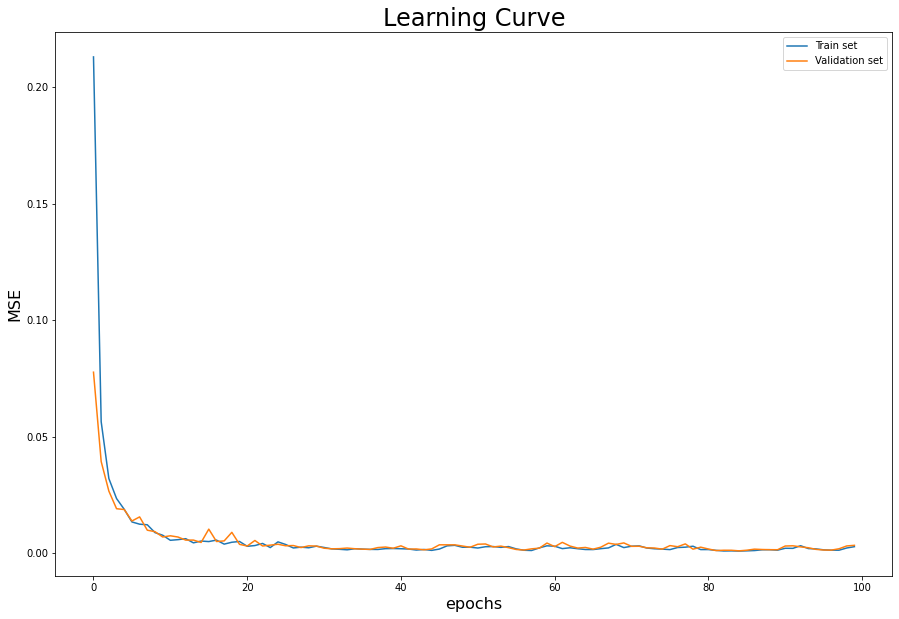

time: 6.56 s (started: 2021-06-23 09:14:53 +00:00)


In [36]:
# plot loss during training
plt.figure(figsize=(15,10))

plt.title('Learning Curve', fontsize=24)
plt.plot(history.history['loss'], label='Train set')
plt.plot(history.history['val_loss'], label='Validation set')
plt.legend()
plt.ylabel('MSE', fontsize=16)
plt.xlabel('epochs', fontsize=16)
plt.show()

In [37]:
# newX = asarray([row])
yhat = model.predict(X_test_scaled)
yhat = y_scaler.inverse_transform(yhat)

time: 3.8 s (started: 2021-06-23 09:15:08 +00:00)


In [38]:
yhat = pd.DataFrame(yhat)

yhat[yhat<0.0009]=0
yhat

0         1         2         3         4         5         6  \
0     2.153629  0.043560  0.000000  0.000000  8.321095  0.000000  0.011495   
1     2.441986  0.039605  0.003969  0.000000  1.984897  0.000000  0.004404   
2     3.186064  0.000000  0.000000  0.000000  1.936660  0.002779  0.020642   
3     2.726031  0.000000  0.000000  0.000000  2.317293  0.000000  0.121024   
4     1.560691  0.000000  0.000000  0.000000  2.038328  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
2928  2.315676  0.006578  0.002076  0.000000  1.505713  0.000000  0.004160   
2929  2.144737  0.000000  0.000000  0.000000  3.108715  0.001097  0.008000   
2930  2.088053  0.036299  0.001599  0.000000  4.892284  0.000000  0.006437   
2931  3.017936  0.000000  0.000000  0.003956  1.477900  0.000000  0.013146   
2932  2.570276  0.000000  0.000000  0.000000  2.220770  0.000958  0.023031   

             7  
0     0.001729  
1     0.000000  
2     0.003459  
3     0.015980  
4     0.000000  
...        ...  
2928  0.000000  
2929  0.000000  
2930  0.001380  
2931  0.000000  
2932  0.000000  

[2933 rows x 8 columns]

time: 593 ms (started: 2021-06-23 09:15:12 +00:00)


In [39]:
y_test.reset_index(inplace=True)
y_test = y_test.drop('index',axis=1)
y_test

ALL_C_1_1_1   ALL_C_1_2_1   ALL_C_1_3_1   ALL_C_1_4_1  ALL_C_2_1_1  \
0        2.110203  4.070306e-02  2.658384e-04  1.468954e-08     8.218113   
1        2.423583  4.252625e-02  1.659820e-03  3.359020e-06     1.999089   
2        3.145891  9.796114e-42  2.073701e-20  6.937462e-15     1.969509   
3        2.651773  7.583069e-45  1.246256e-17  3.298997e-12     2.267064   
4        1.597323  4.499063e-14  8.442858e-17  1.345402e-15     2.065512   
...           ...           ...           ...           ...          ...   
2928     2.331750  7.990707e-03  7.887336e-09  6.736923e-13     1.522755   
2929     2.153687  2.585931e-06  1.550457e-14  1.567519e-14     3.052220   
2930     2.125351  4.056877e-02  3.495467e-07  5.129591e-11     4.814350   
2931     2.985500  1.049751e-12  4.893820e-04  3.997455e-03     1.520354   
2932     2.551190  1.192356e-25  7.468314e-08  1.716069e-05     2.237833   

       ALL_C_2_2_1   ALL_C_2_3_1   ALL_C_2_4_1  
0     1.949602e-11  1.437741e-14  2.097670e-12  
1     6.240240e-08  2.940544e-11  5.502393e-10  
2     1.858303e-03  1.430854e-02  3.091230e-03  
3     2.899265e-04  1.026968e-01  1.471392e-02  
4     3.335982e-05  1.767596e-12  8.183785e-16  
...            ...           ...           ...  
2928  3.235713e-19  8.910538e-21  2.571248e-19  
2929  1.345796e-14  5.600011e-14  3.414578e-13  
2930  4.138533e-06  7.158064e-16  9.787932e-16  
2931  2.553138e-05  7.749651e-03  7.360973e-04  
2932  5.000633e-04  2.030691e-02  1.517409e-04  

[2933 rows x 8 columns]

time: 992 ms (started: 2021-06-23 09:15:34 +00:00)


In [40]:
yhat.max(0)

0    9.666024
1    0.338323
2    1.734189
3    0.136028
4    9.493714
5    0.375403
6    2.063205
7    0.152005
dtype: float32

time: 411 ms (started: 2021-06-23 09:15:36 +00:00)


In [41]:
y_test.max(0)

ALL_C_1_1_1    9.299518
ALL_C_1_2_1    0.360194
ALL_C_1_3_1    1.478991
ALL_C_1_4_1    0.145219
ALL_C_2_1_1    9.299285
ALL_C_2_2_1    0.351520
ALL_C_2_3_1    1.922497
ALL_C_2_4_1    0.141282
dtype: float64

time: 15.1 ms (started: 2021-06-23 09:15:38 +00:00)


In [42]:
results = {'ALL_SPC_1_1_1': mean_absolute_error(y_test['ALL_C_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': mean_absolute_error(y_test['ALL_C_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': mean_absolute_error(y_test['ALL_C_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": mean_absolute_error(y_test['ALL_C_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': mean_absolute_error(y_test['ALL_C_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': mean_absolute_error(y_test['ALL_C_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': mean_absolute_error(y_test['ALL_C_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': mean_absolute_error(y_test['ALL_C_2_4_1'], yhat[7])}

results

{'ALL_SPC_1_1_1': 0.04179878443315421,
 'ALL_SPC_1_2_1': 0.0006967264061640224,
 'ALL_SPC_1_3_1': 0.007672962625087427,
 'ALL_SPC_1_4_1': 0.0003006557754274097,
 'ALL_SPC_2_1_1': 0.04915091318699376,
 'ALL_SPC_2_2_1': 0.000628764065428587,
 'ALL_SPC_2_3_1': 0.00811333552068146,
 'ALL_SPC_2_4_1': 0.0005459808179097478}

time: 142 ms (started: 2021-06-23 09:15:46 +00:00)


In [43]:
results = {'ALL_SPC_1_1_1': np.sqrt(mean_squared_error(y_test['ALL_C_1_1_1'], yhat[0])),
        'ALL_SPC_1_2_1': np.sqrt(mean_squared_error(y_test['ALL_C_1_2_1'], yhat[1])),
        'ALL_SPC_1_3_1': np.sqrt(mean_squared_error(y_test['ALL_C_1_3_1'], yhat[2])),
        "ALL_SPC_1_4_1": np.sqrt(mean_squared_error(y_test['ALL_C_1_4_1'], yhat[3])),
        'ALL_SPC_2_1_1': np.sqrt(mean_squared_error(y_test['ALL_C_2_1_1'], yhat[4])),
        'ALL_SPC_2_2_1': np.sqrt(mean_squared_error(y_test['ALL_C_2_2_1'], yhat[5])),
        'ALL_SPC_2_3_1': np.sqrt(mean_squared_error(y_test['ALL_C_2_3_1'], yhat[6])),
        'ALL_SPC_2_4_1': np.sqrt(mean_squared_error(y_test['ALL_C_2_4_1'], yhat[7]))}
results

{'ALL_SPC_1_1_1': 0.06548411704573436,
 'ALL_SPC_1_2_1': 0.0018331538798332942,
 'ALL_SPC_1_3_1': 0.021518834499575475,
 'ALL_SPC_1_4_1': 0.0009264962447182257,
 'ALL_SPC_2_1_1': 0.06738844591593512,
 'ALL_SPC_2_2_1': 0.0018333725929322938,
 'ALL_SPC_2_3_1': 0.014752805489713444,
 'ALL_SPC_2_4_1': 0.0012622119787317643}

time: 160 ms (started: 2021-06-23 09:15:46 +00:00)


In [44]:
def error(true, pred):
    return np.mean(np.abs((true-pred)/true))

time: 684 µs (started: 2021-06-23 09:15:47 +00:00)


In [45]:
results = {'ALL_SPC_1_1_1': error(y_test['ALL_C_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': error(y_test['ALL_C_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': error(y_test['ALL_C_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": error(y_test['ALL_C_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': error(y_test['ALL_C_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': error(y_test['ALL_C_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': error(y_test['ALL_C_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': error(y_test['ALL_C_2_4_1'], yhat[7])}
results

{'ALL_SPC_1_1_1': 0.015019084366612355,
 'ALL_SPC_1_2_1': 8.763980865519398e+29,
 'ALL_SPC_1_3_1': 3.276278820064205e+21,
 'ALL_SPC_1_4_1': 1910.258439006581,
 'ALL_SPC_2_1_1': 0.02172124552842287,
 'ALL_SPC_2_2_1': 46469585179279.875,
 'ALL_SPC_2_3_1': 1.4618185882444e+22,
 'ALL_SPC_2_4_1': 83436495287154.45}

time: 291 ms (started: 2021-06-23 09:15:48 +00:00)


In [46]:
from sklearn.metrics import r2_score

results = {'ALL_SPC_1_1_1': r2_score(y_test['ALL_C_1_1_1'], yhat[0]),
        'ALL_SPC_1_2_1': r2_score(y_test['ALL_C_1_2_1'], yhat[1]),
        'ALL_SPC_1_3_1': r2_score(y_test['ALL_C_1_3_1'], yhat[2]),
        "ALL_SPC_1_4_1": r2_score(y_test['ALL_C_1_4_1'], yhat[3]),
        'ALL_SPC_2_1_1': r2_score(y_test['ALL_C_2_1_1'], yhat[4]),
        'ALL_SPC_2_2_1': r2_score(y_test['ALL_C_2_2_1'], yhat[5]),
        'ALL_SPC_2_3_1': r2_score(y_test['ALL_C_2_3_1'], yhat[6]),
        'ALL_SPC_2_4_1': r2_score(y_test['ALL_C_2_4_1'], yhat[7])}

results

{'ALL_SPC_1_1_1': 0.9964948388457074,
 'ALL_SPC_1_2_1': 0.9956751752717996,
 'ALL_SPC_1_3_1': 0.9618896046526847,
 'ALL_SPC_1_4_1': 0.9957580148005881,
 'ALL_SPC_2_1_1': 0.9965484575754097,
 'ALL_SPC_2_2_1': 0.9955043918871451,
 'ALL_SPC_2_3_1': 0.9871360614841354,
 'ALL_SPC_2_4_1': 0.9912515891389015}

time: 944 ms (started: 2021-06-23 09:15:48 +00:00)


In [47]:
def scatter(column, number):
    fig, ax = plt.subplots(figsize=(20,15), dpi=300)
    ax.scatter(y_test[column], yhat[number], c='#00A78D', label= 'ANN', s=100)

    lims = [
        np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
        np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
    ]

    # now plot both limits against eachother
    ax.plot(lims, lims, color='#A6A6A6')
    # ax.set_aspect('equal')
    ax.set_ylim(lims)
    ax.set_xlim(lims)

    ax.grid()
    ax.set_title('ANN Predictions', fontsize=24)
    ax.legend(loc='best', prop={'size': 18})
    ax.set_xlabel('True Value', fontsize=24)
    ax.set_ylabel('Predicted Value', fontsize=24)
    plt.show()

time: 84.6 ms (started: 2021-06-23 09:15:50 +00:00)


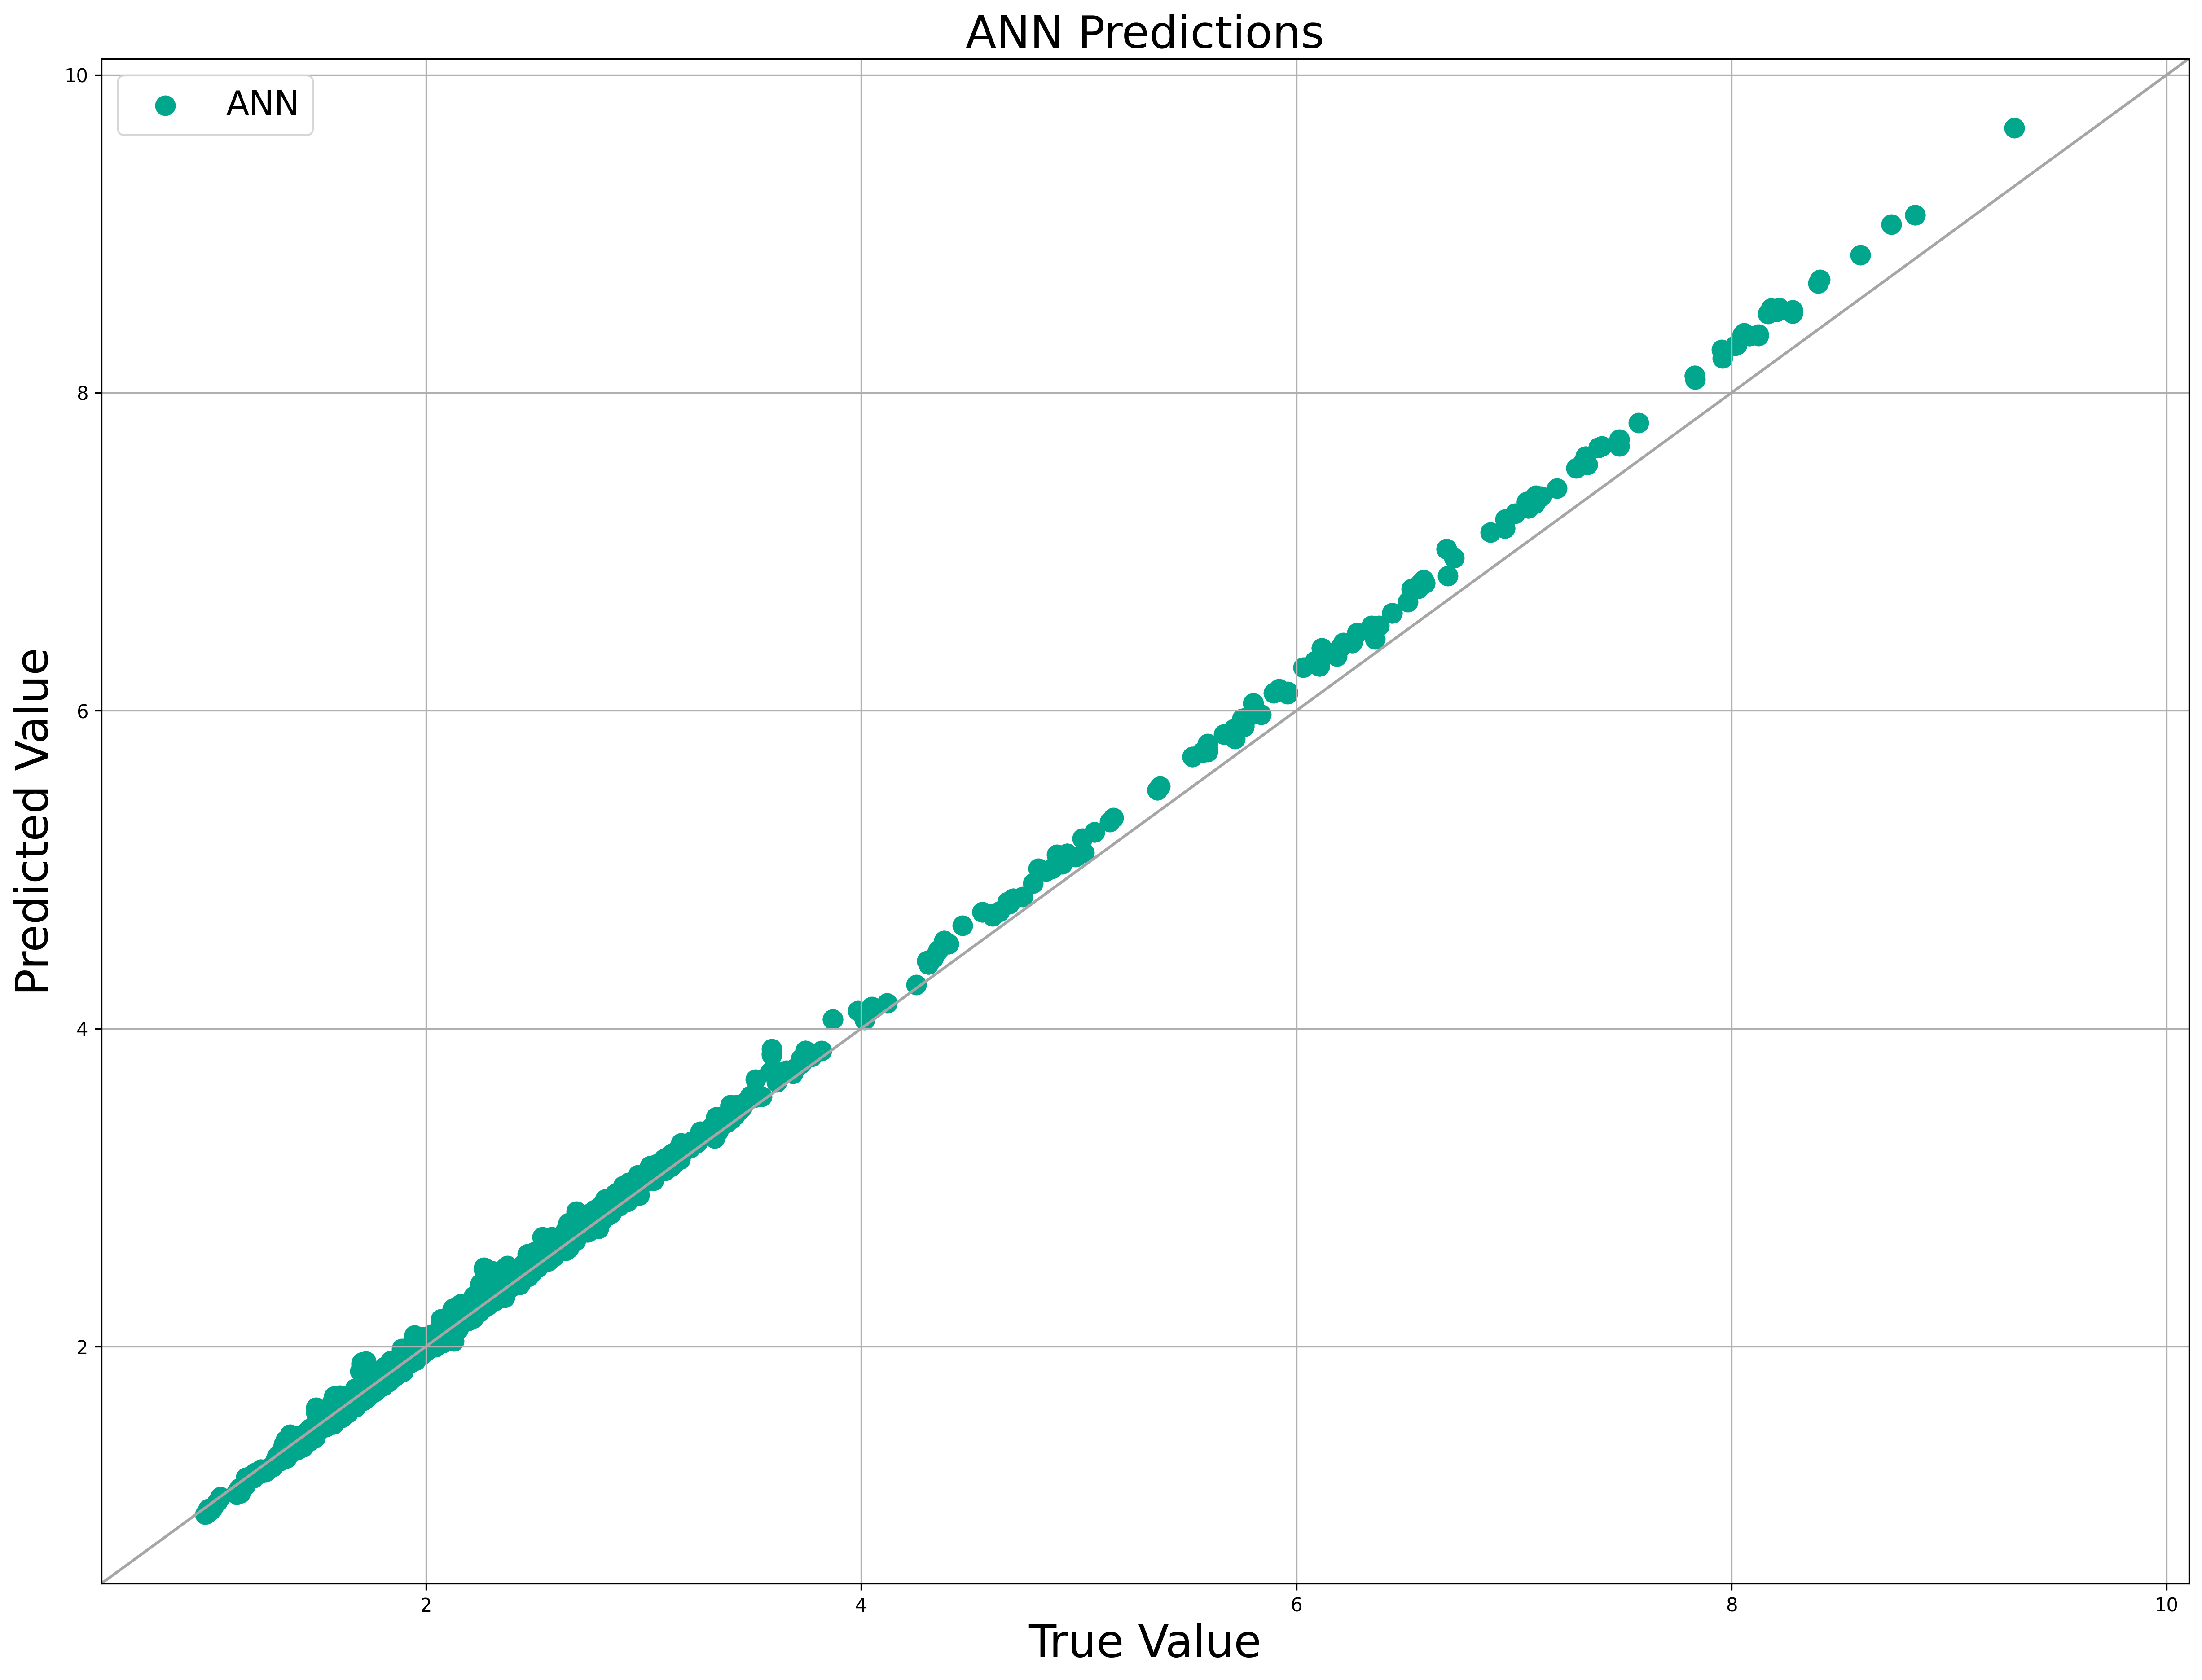

time: 38.6 s (started: 2021-06-23 09:16:00 +00:00)


In [48]:
scatter('ALL_C_1_1_1',0)

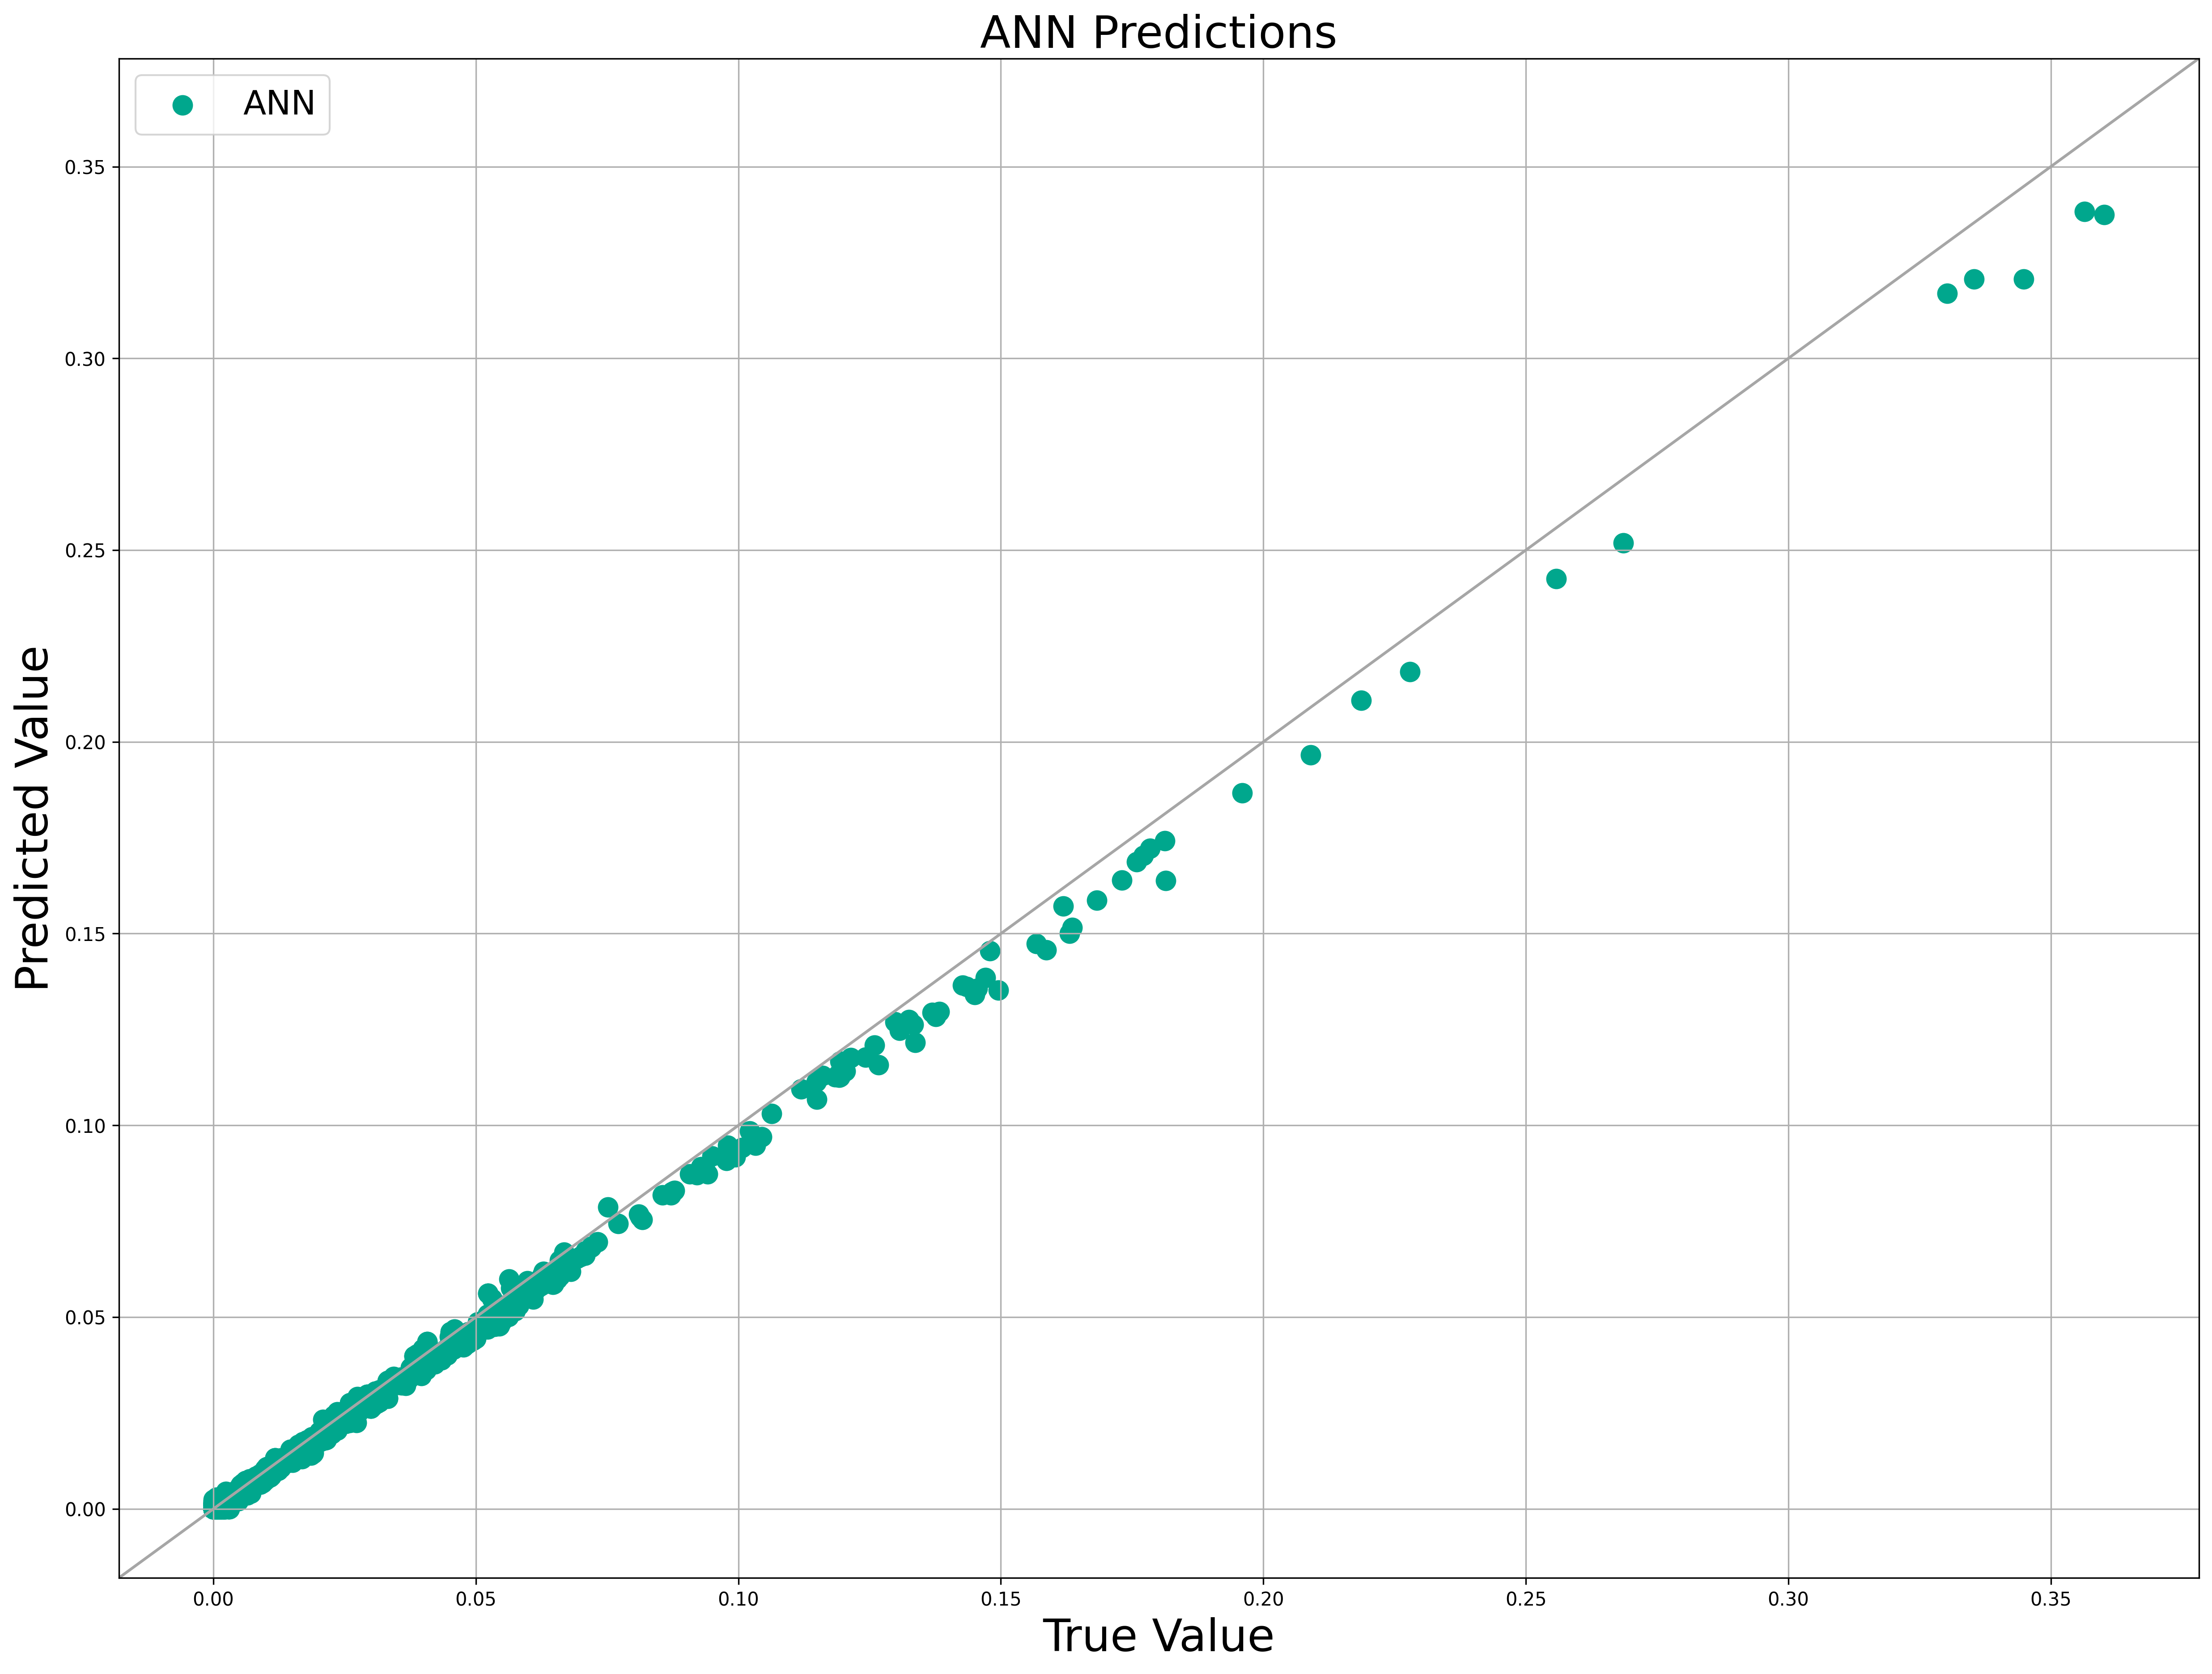

time: 36.7 s (started: 2021-06-23 09:17:03 +00:00)


In [49]:
scatter('ALL_C_1_2_1',1)

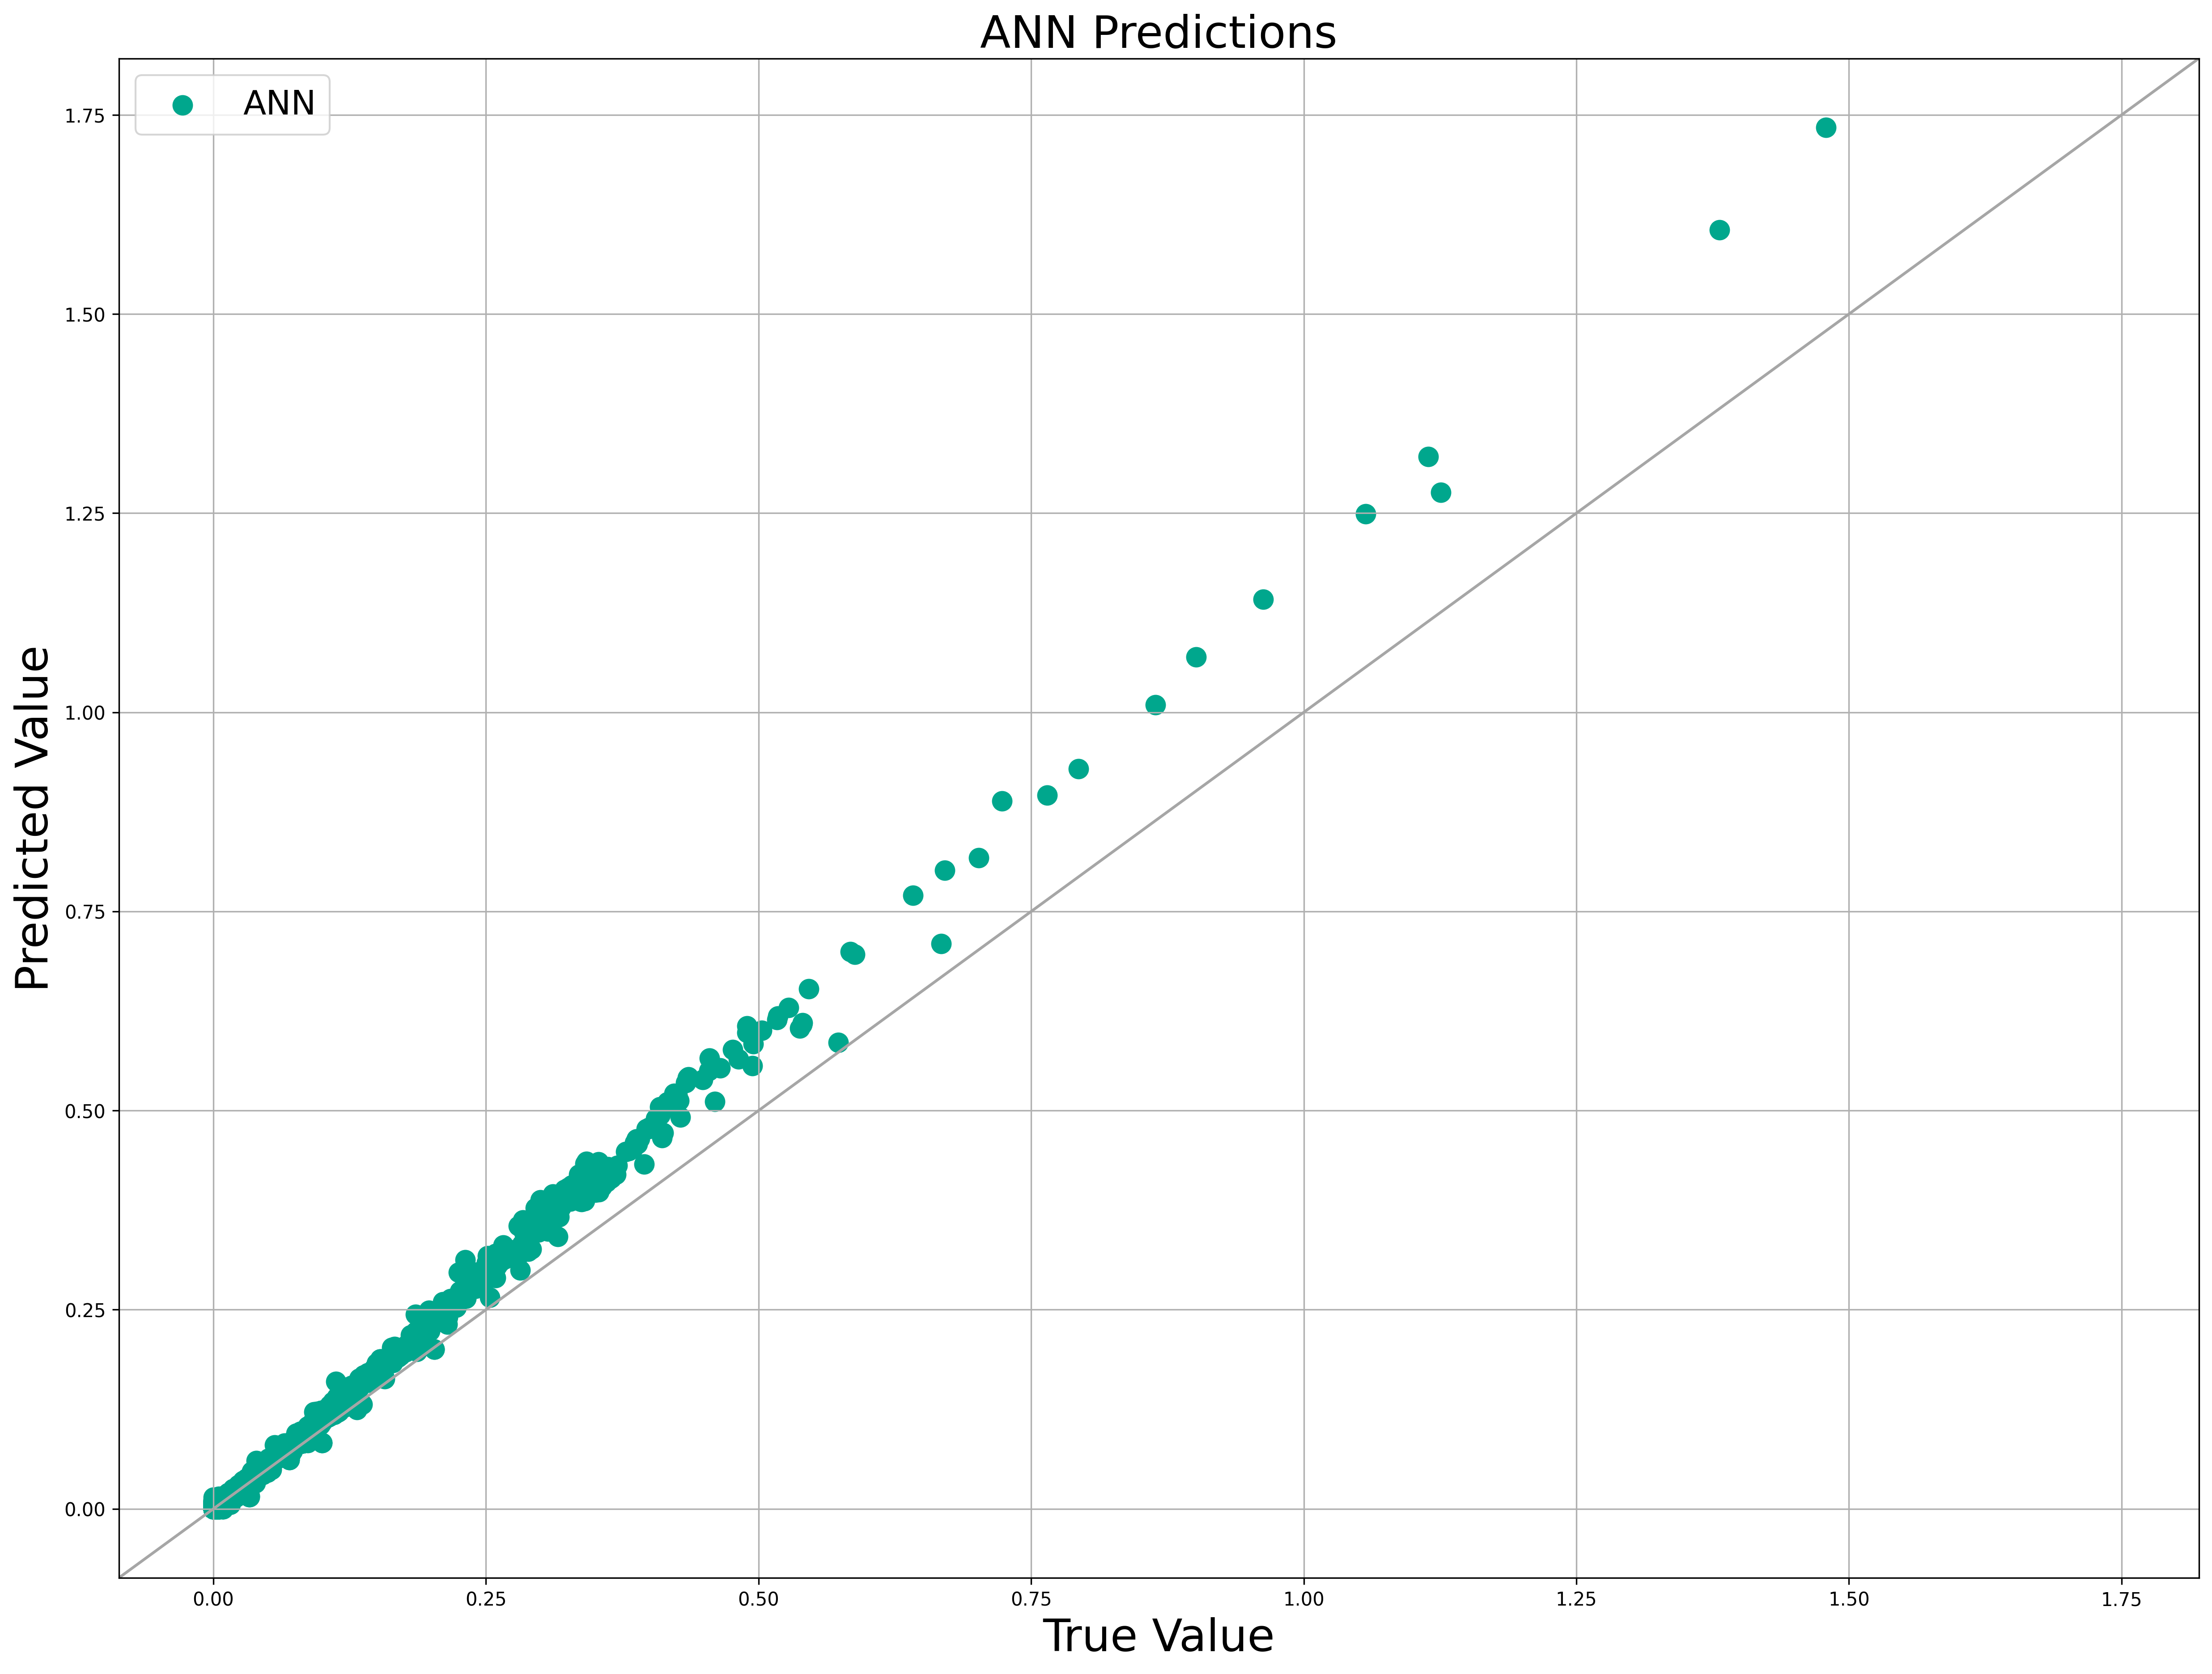

time: 22.6 s (started: 2021-06-23 09:17:40 +00:00)


In [50]:
scatter('ALL_C_1_3_1',2)

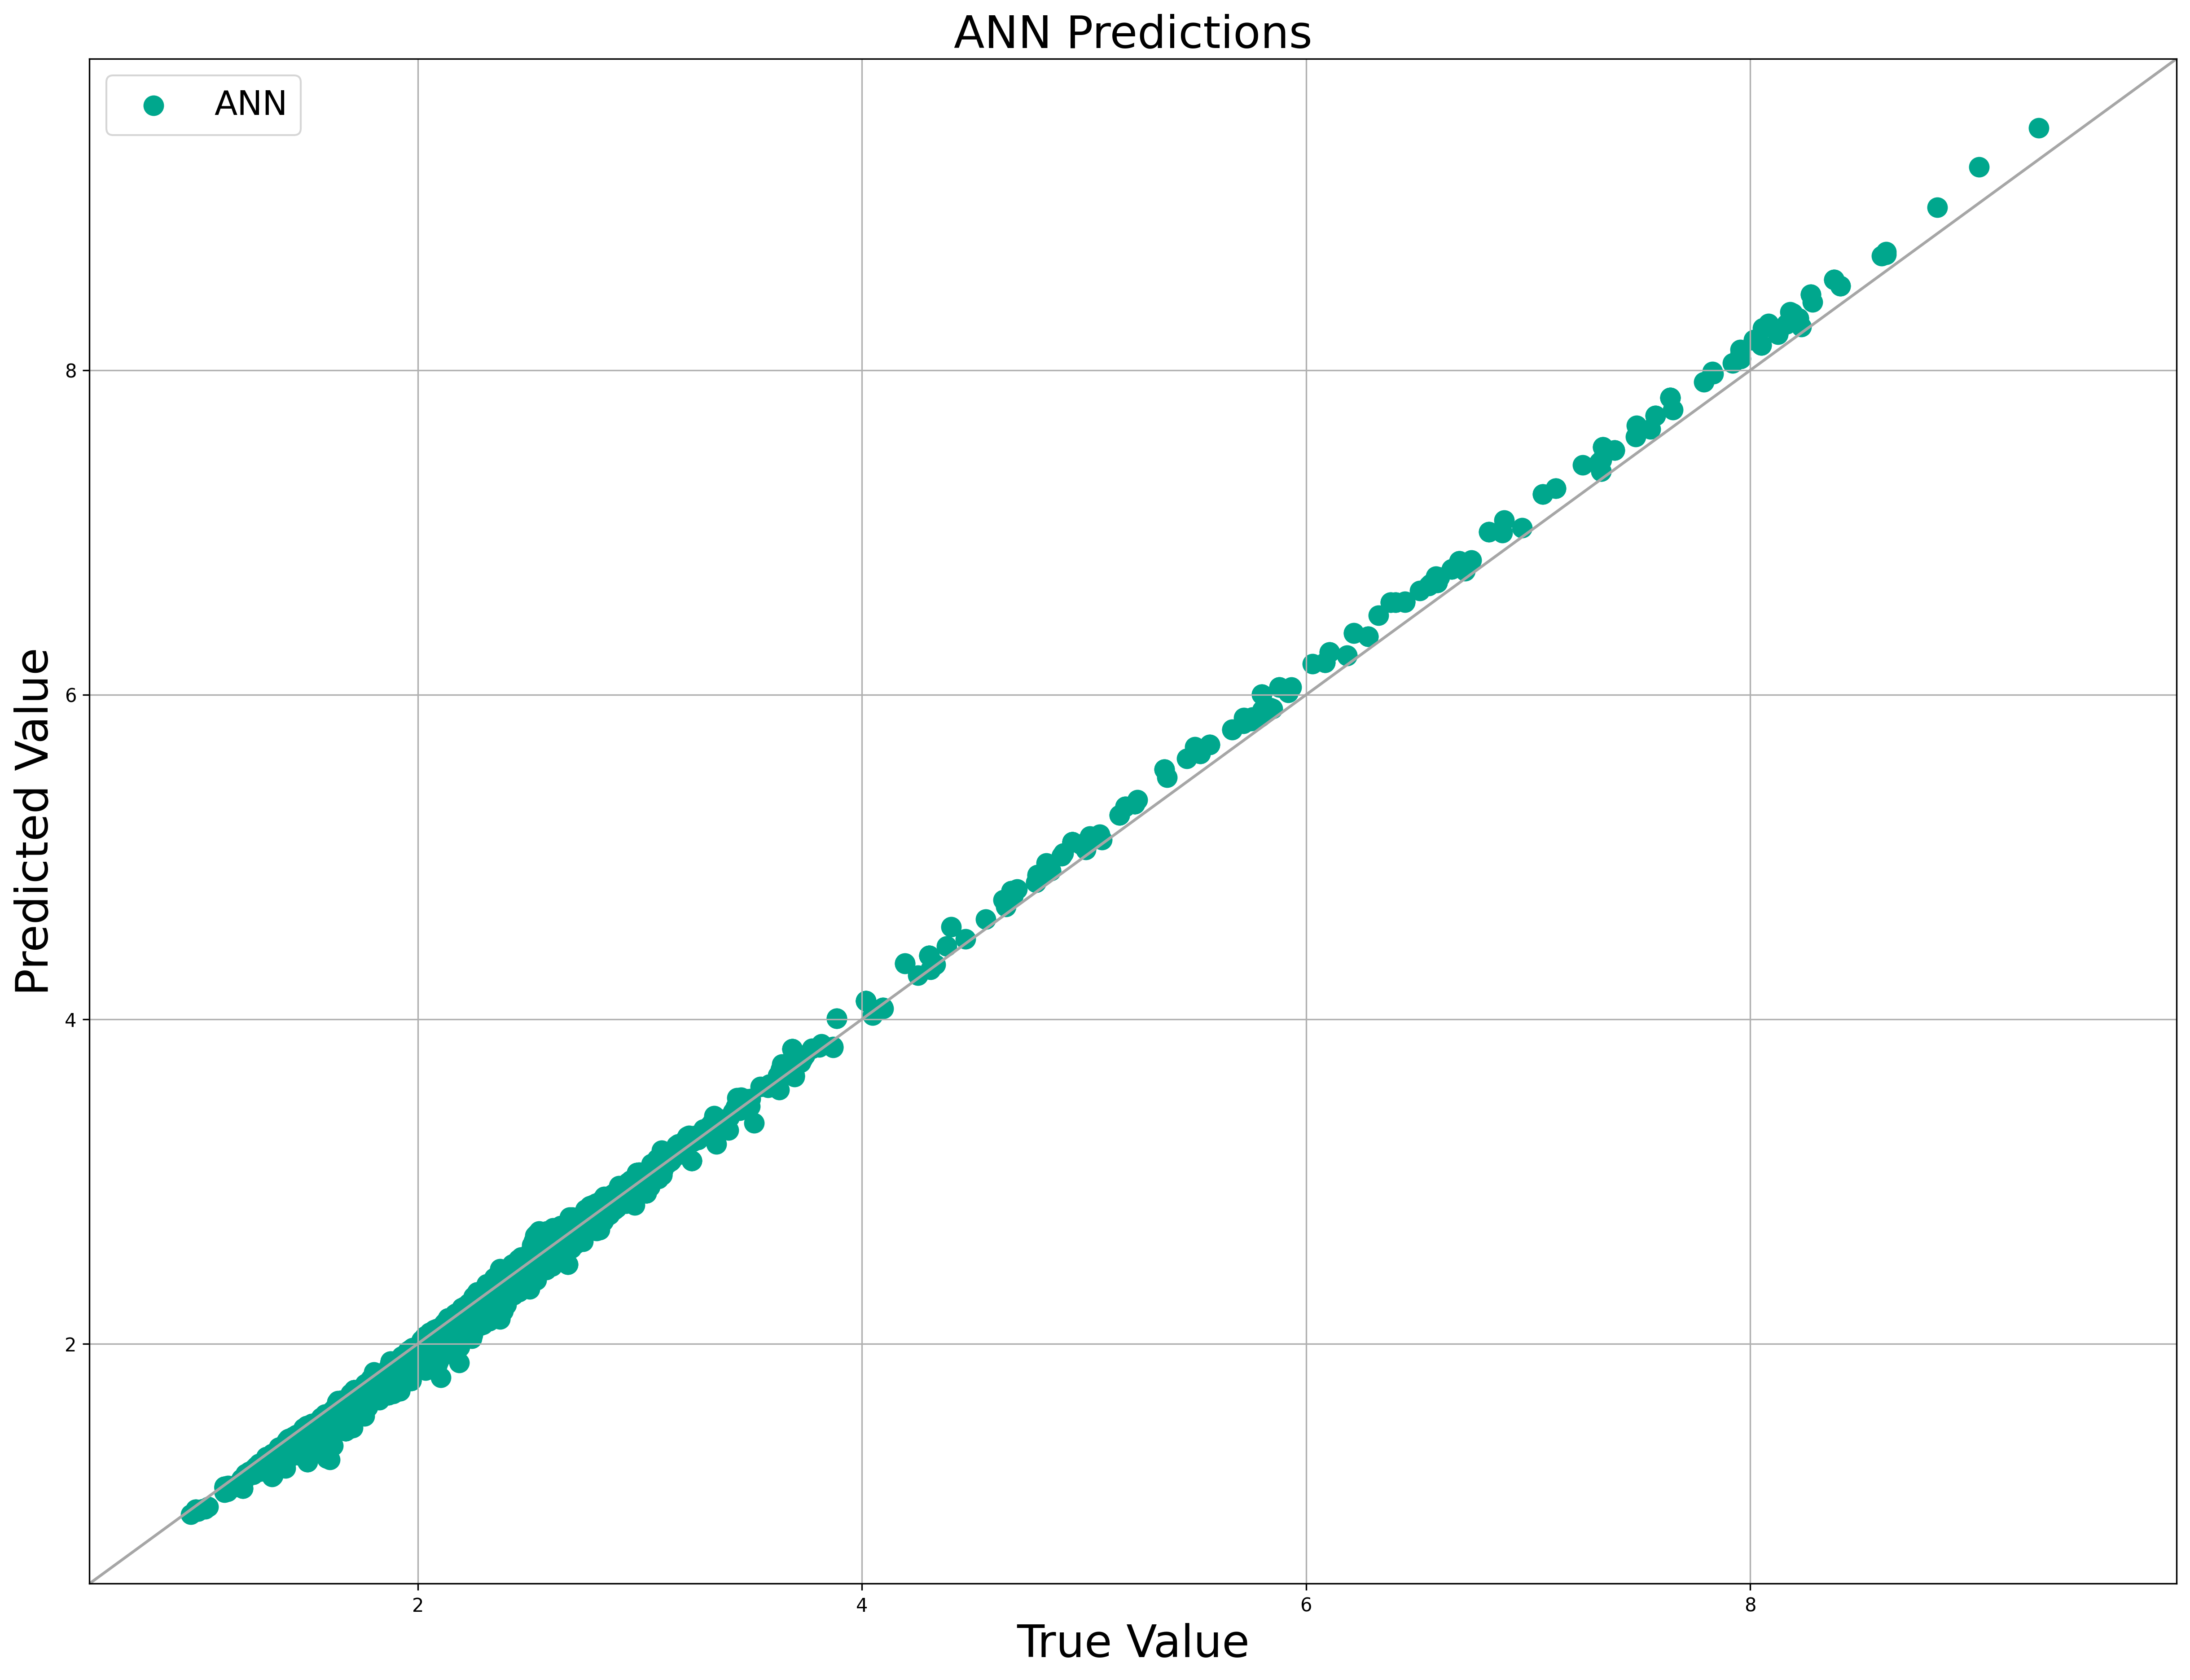

time: 27.5 s (started: 2021-06-23 09:18:21 +00:00)


In [51]:
scatter('ALL_C_2_1_1',4)

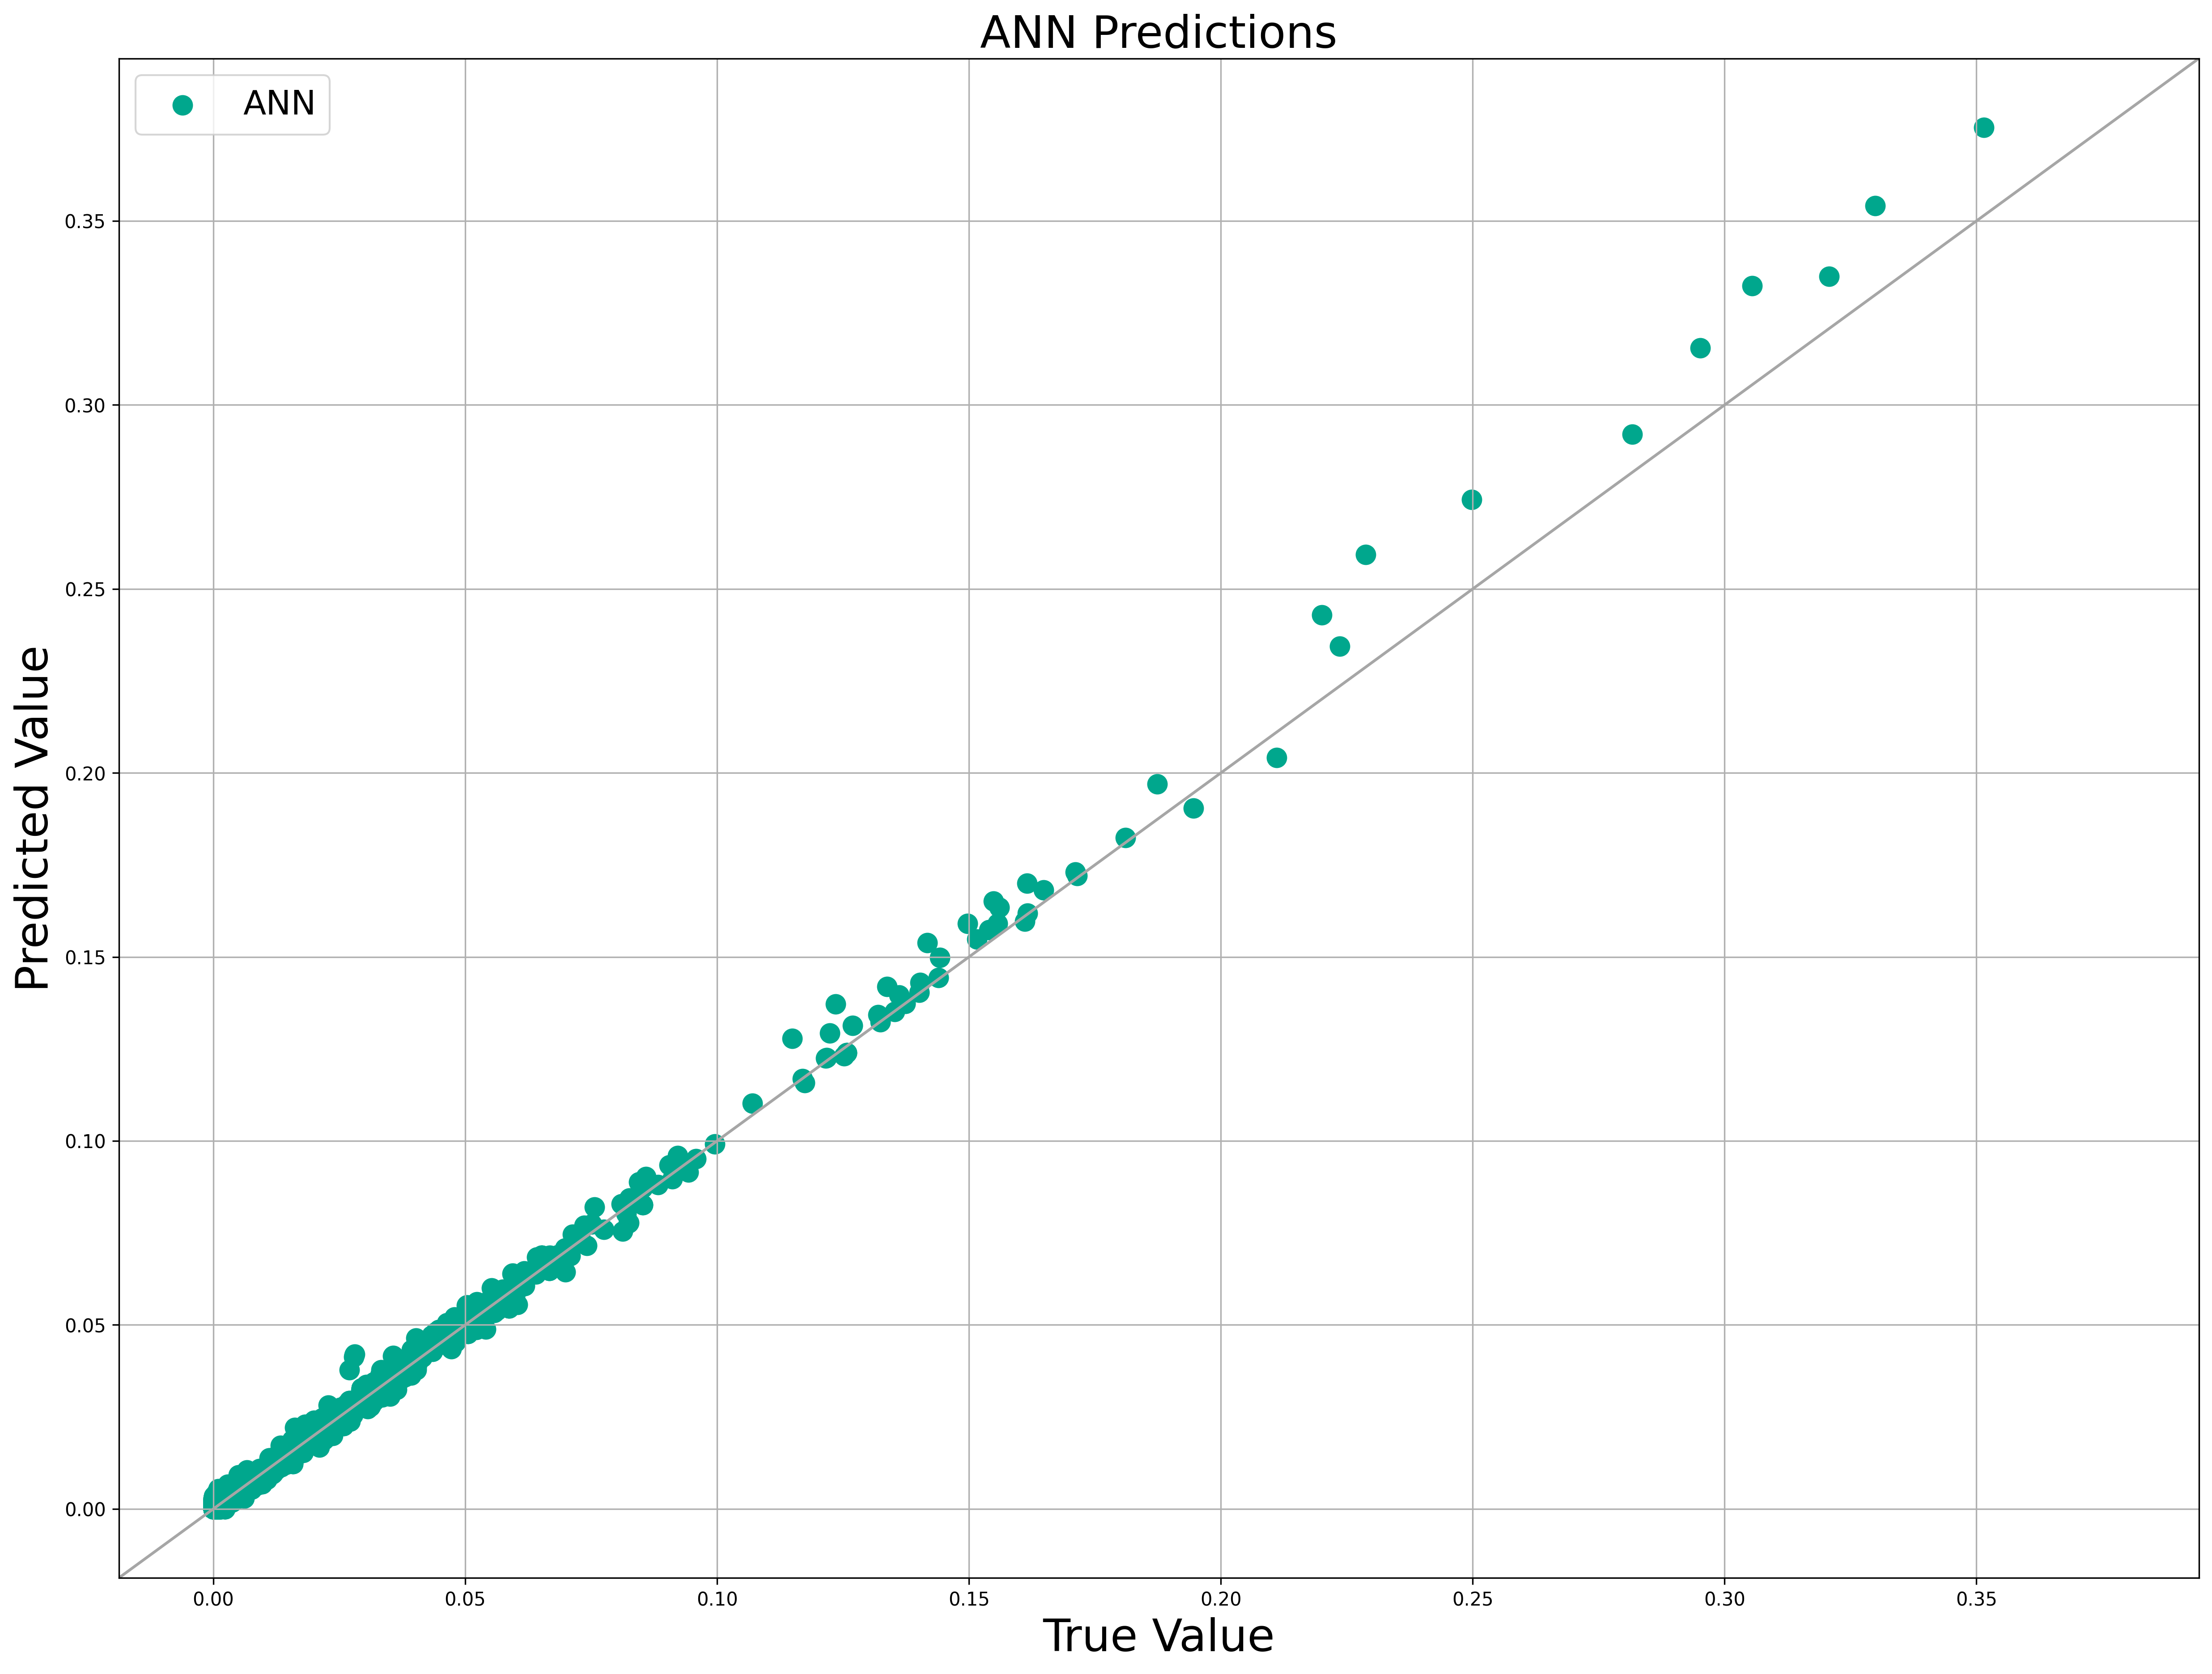

time: 25 s (started: 2021-06-23 09:18:49 +00:00)


In [52]:
scatter('ALL_C_2_2_1',5)

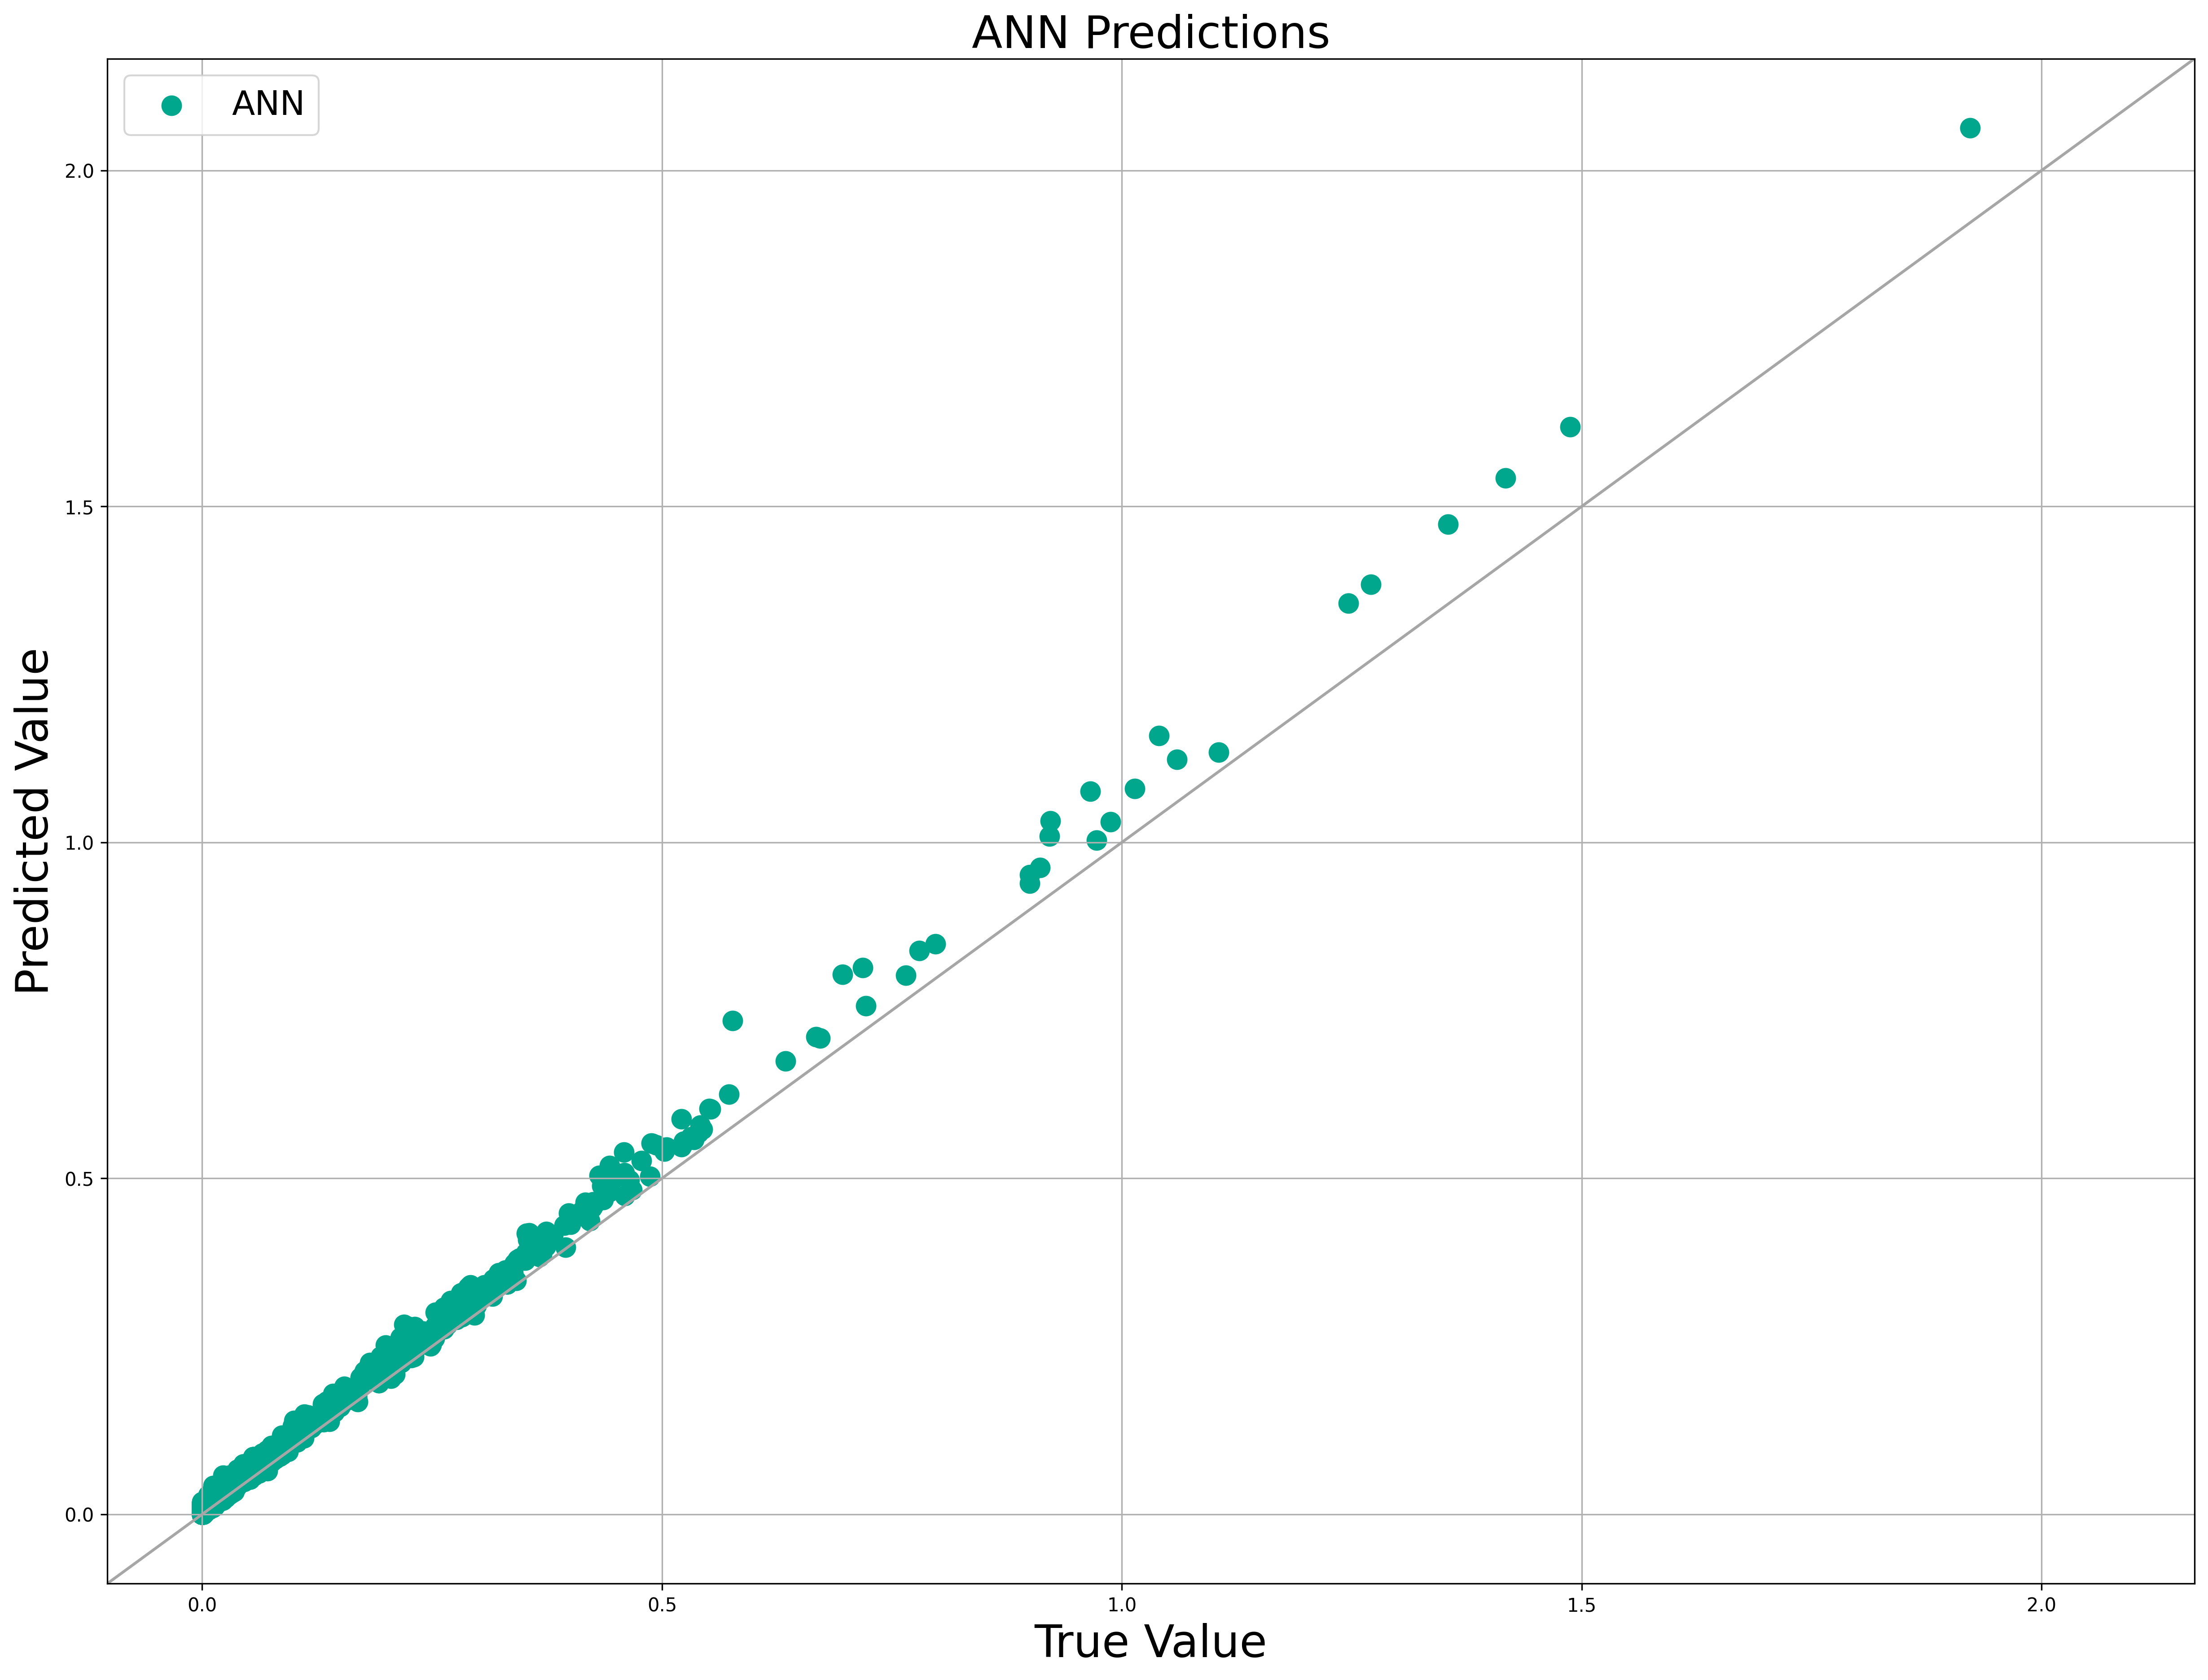

time: 29.6 s (started: 2021-06-23 09:19:14 +00:00)


In [53]:
scatter('ALL_C_2_3_1',6)

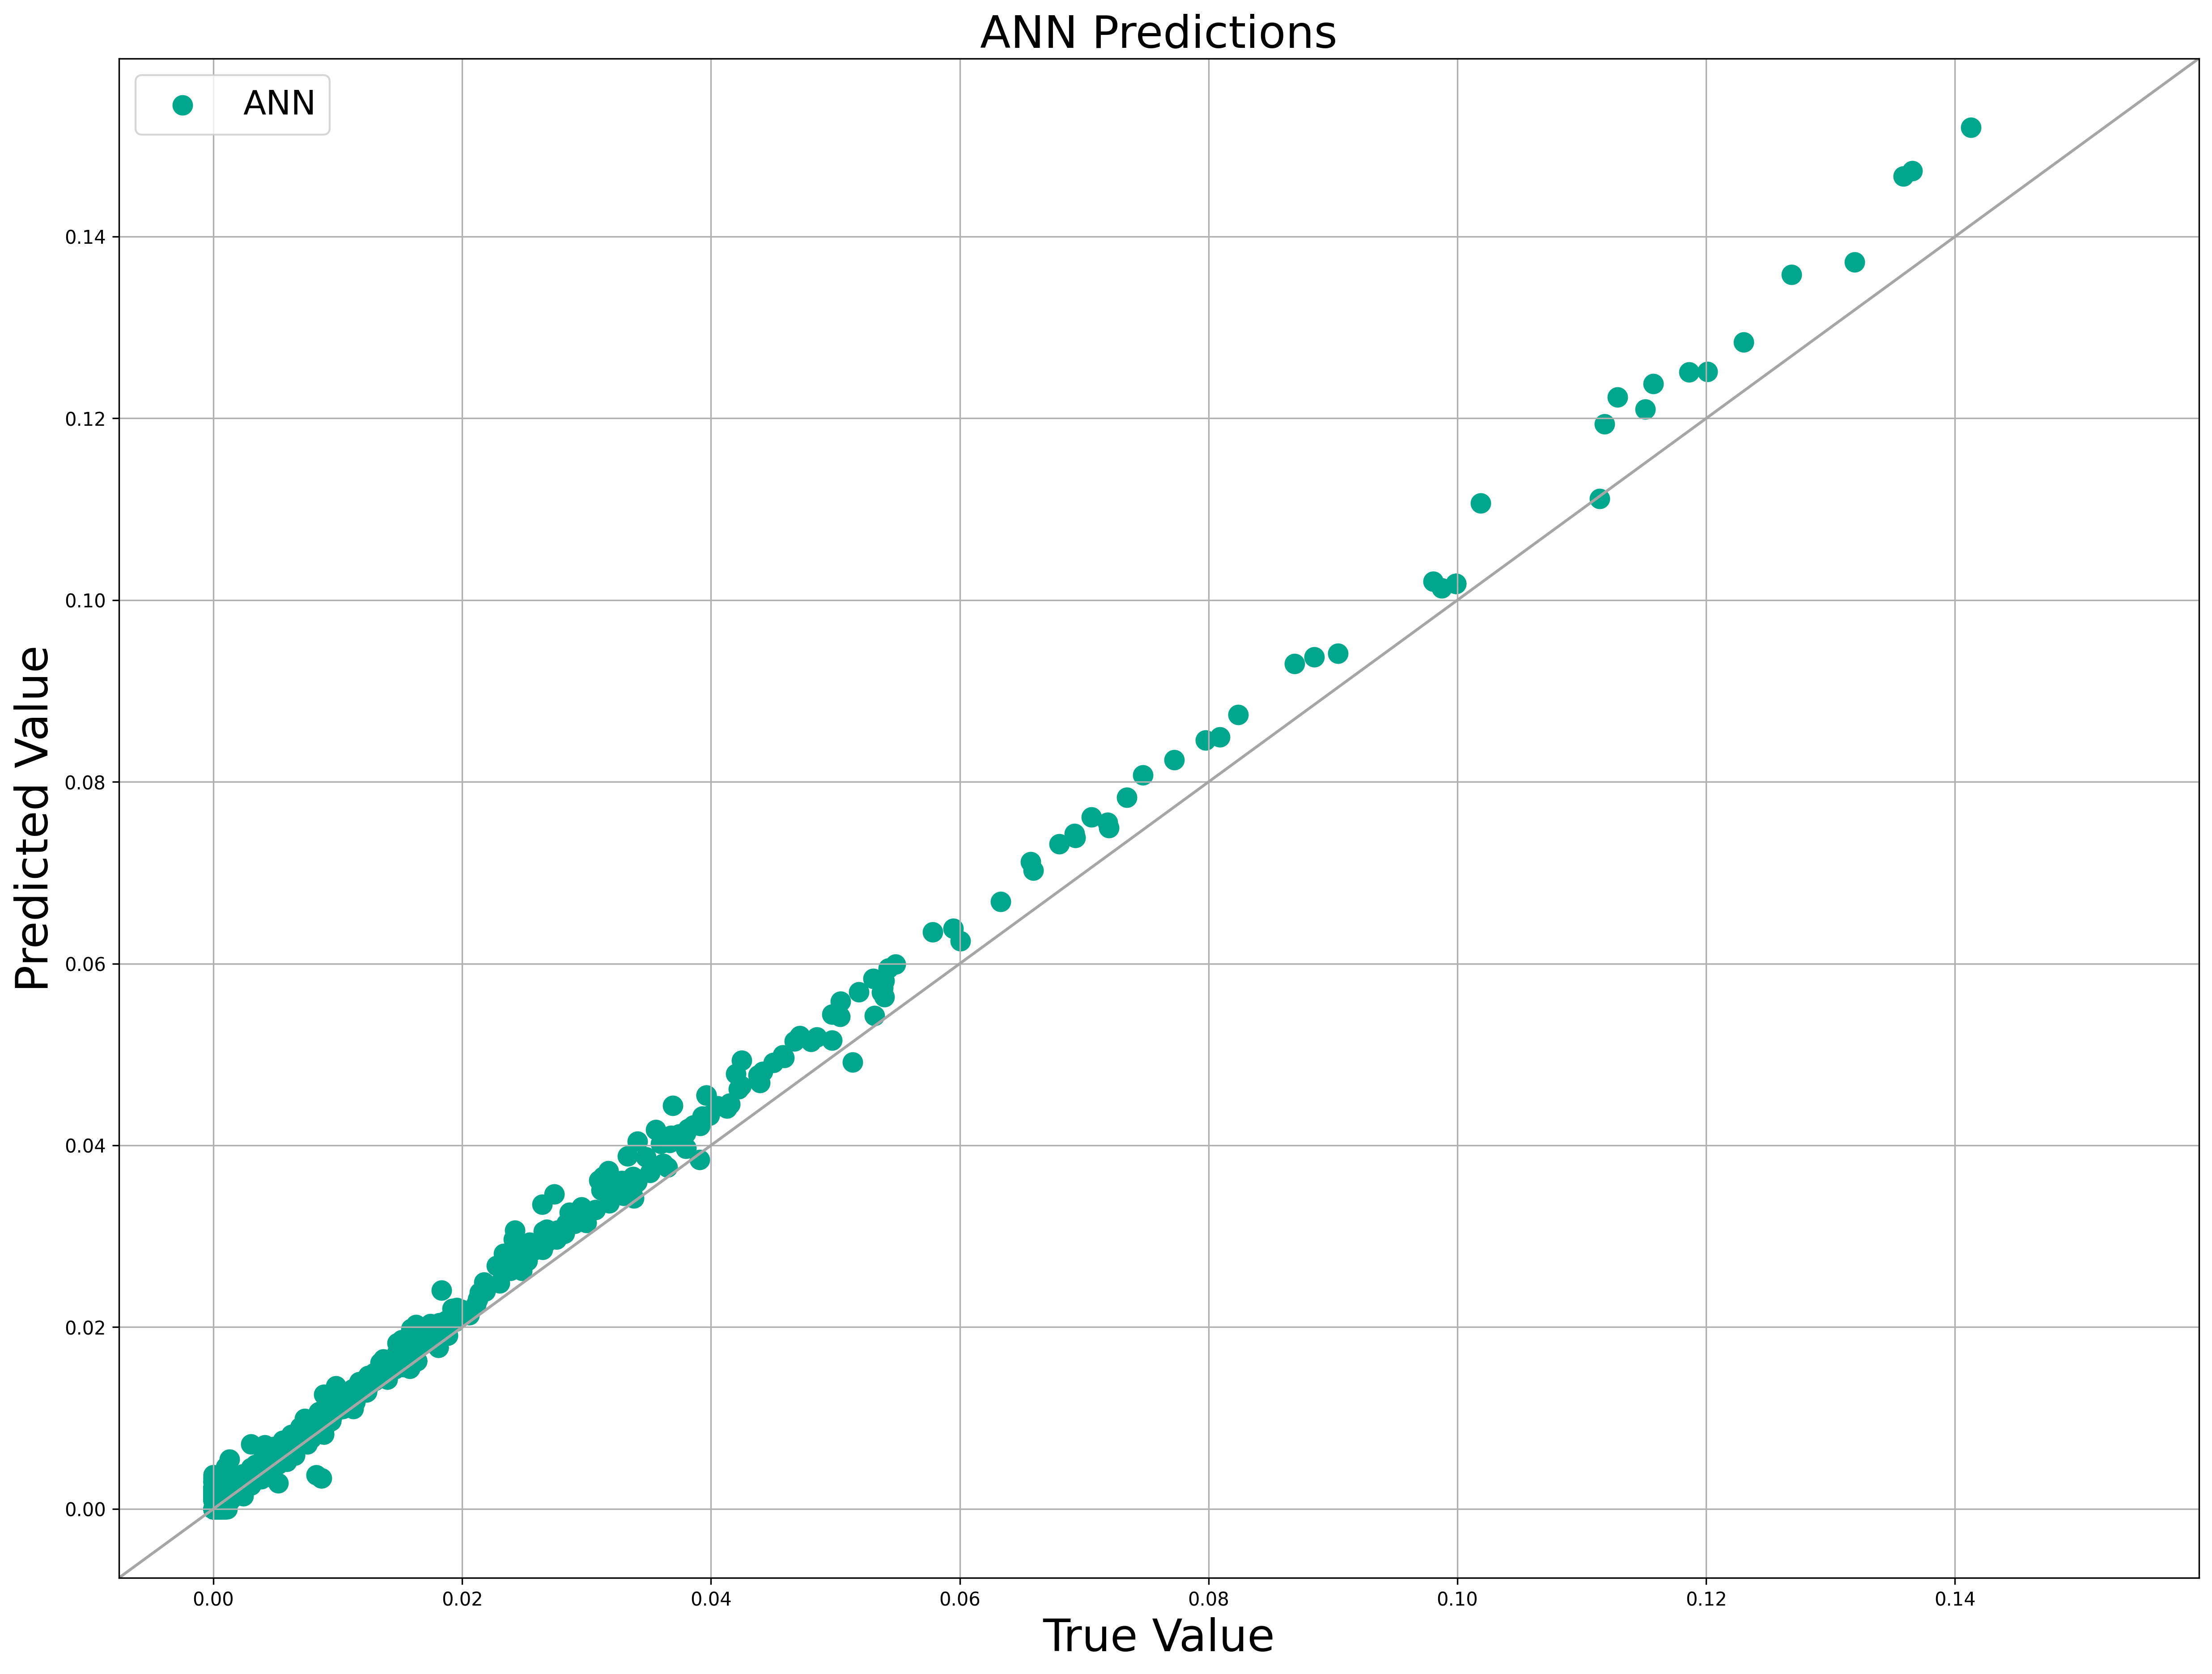

time: 29.6 s (started: 2021-06-23 09:19:44 +00:00)


In [54]:
scatter('ALL_C_2_4_1',7)

## Μελέτη απόδοσης προβλέψεων σε τιμές `>=0,1`

In [55]:
yhat_big = yhat[yhat >= 0.1]
ytest_big = y_test[y_test >= 0.1]

time: 146 ms (started: 2021-06-23 09:20:14 +00:00)


In [56]:
def mae_big(column, number):
    df1 = ytest_big[column]
    df2 = yhat_big[number]

    df1 = pd.DataFrame(df1)
    df2 = pd.DataFrame(df2)

    rows_with_nan = [index for index, row in df1.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)

    rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)
    print(mean_absolute_error(df1[column], df2[number]),'\n')

time: 1.15 ms (started: 2021-06-23 09:20:14 +00:00)


In [57]:
mae_big('ALL_C_1_2_1',1)
mae_big('ALL_C_1_3_1',2)
mae_big('ALL_C_1_4_1',3)
mae_big('ALL_C_2_1_1',4)
mae_big('ALL_C_2_2_1',5)
mae_big('ALL_C_2_3_1',6)
mae_big('ALL_C_2_4_1',7)

0.00898133935398725 

0.04647131158765826 

0.007316517519716806 

0.04915091318699376 

0.0074283199746038656 

0.028281255977178933 

0.007377977139202835 

time: 1min 4s (started: 2021-06-23 09:20:14 +00:00)


In [58]:
def r2_big(column, number):
    df1 = ytest_big[column]
    df2 = yhat_big[number]

    df1 = pd.DataFrame(df1)
    df2 = pd.DataFrame(df2)

    rows_with_nan = [index for index, row in df1.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)

    rows_with_nan = [index for index, row in df2.iterrows() if row.isnull().any()]
    df1=df1.drop(rows_with_nan)
    df2=df2.drop(rows_with_nan)
    print(r2_score(df1[column], df2[number]),'\n')

time: 1.21 ms (started: 2021-06-23 09:21:18 +00:00)


In [59]:
r2_big('ALL_C_1_2_1',1)
r2_big('ALL_C_1_3_1',2)
r2_big('ALL_C_1_4_1',3)
r2_big('ALL_C_2_1_1',4)
r2_big('ALL_C_2_2_1',5)
r2_big('ALL_C_2_3_1',6)
r2_big('ALL_C_2_4_1',7)

0.9765258711582264 

0.8962372313584052 

0.6694565089933401 

0.9965484575754097 

0.9683015806671076 

0.9770975279545497 

0.48718121150964955 

time: 1min 13s (started: 2021-06-23 09:21:19 +00:00)


In [60]:
results = {'ALL_C_1_1_1': error(ytest_big['ALL_C_1_1_1'], yhat_big[0]),
        'ALL_C_1_2_1': error(ytest_big['ALL_C_1_2_1'], yhat_big[1]),
        'ALL_C_1_3_1': error(ytest_big['ALL_C_1_3_1'], yhat_big[2]),
        "ALL_C_1_4_1": error(ytest_big['ALL_C_1_4_1'], yhat_big[3]),
        'ALL_C_2_1_1': error(ytest_big['ALL_C_2_1_1'], yhat_big[4]),
        'ALL_C_2_2_1': error(ytest_big['ALL_C_2_2_1'], yhat_big[5]),
        'ALL_C_2_3_1': error(ytest_big['ALL_C_2_3_1'], yhat_big[6]),
        'ALL_C_2_4_1': error(ytest_big['ALL_C_2_4_1'], yhat_big[7])}
results

{'ALL_C_1_1_1': 0.015019084366612355,
 'ALL_C_1_2_1': 0.0521371837749266,
 'ALL_C_1_3_1': 0.17384833775576328,
 'ALL_C_1_4_1': 0.058047326943486965,
 'ALL_C_2_1_1': 0.02172124552842287,
 'ALL_C_2_2_1': 0.03810348427391136,
 'ALL_C_2_3_1': 0.11350521848431097,
 'ALL_C_2_4_1': 0.06034407945840519}

time: 293 ms (started: 2021-06-23 09:22:32 +00:00)


In [61]:
model.save('/home/ubuntu/kmexis/fotini/22to8')

INFO:tensorflow:Assets written to: /home/ubuntu/kmexis/fotini/22to8/assets
time: 10.7 s (started: 2021-06-23 09:22:33 +00:00)


In [281]:
from tensorflow import keras

load_model = keras.models.load_model('/home/ubuntu/kmexis/fotini/22to8')

time: 6.7 s (started: 2021-06-23 08:50:21 +00:00)
